# Leads Scoring Case Study: X Education

## Background 

X Education sells online courses to industry professionals.Through it various marketing activities, X Education generated sales leads. The leads are then contacted by the sales team via calls, email etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 


## Problem Statement

While X Education generates a lot of leads, its lead conversion rate is very poor @30%

## Objective

The objective of this exercise is to help X Education to select the most promising leads, i.e. the leads that are most likely to convert into paying customers.  Target conversion rate is in the  ballpark of the target lead conversion rate to be around 80%

## Approach

A regression model was built to  assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance

## Model Building Approach

- Data Cleaning
- Outlier Treatment
- Dummies Generation
- Feature reduction using RFE (reduced to 25 features)
- Manual feature reduction using p-values and VIF
- Logistics Regression Model on train set using lead score cut-off of 50
- Optimizing cut-off using target precision (cut-off selected= 45)
- Testing Logistics Regression Model using test set
- Merging Lead Scores for train and test set
- Data Visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
leads = pd.read_csv('./lead scoring assignment/leads.csv')

In [3]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
lead_number = leads.loc[:,'Lead Number']

In [5]:
leads.shape

(9240, 37)

In [6]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [7]:
leads.rename(columns = lambda x:x.replace(' ',''), inplace=True)

In [8]:
leads.columns

Index(['ProspectID', 'LeadNumber', 'LeadOrigin', 'LeadSource', 'DoNotEmail',
       'DoNotCall', 'Converted', 'TotalVisits', 'TotalTimeSpentonWebsite',
       'PageViewsPerVisit', 'LastActivity', 'Country', 'Specialization',
       'HowdidyouhearaboutXEducation', 'Whatisyourcurrentoccupation',
       'Whatmattersmosttoyouinchoosingacourse', 'Search', 'Magazine',
       'NewspaperArticle', 'XEducationForums', 'Newspaper',
       'DigitalAdvertisement', 'ThroughRecommendations',
       'ReceiveMoreUpdatesAboutOurCourses', 'Tags', 'LeadQuality',
       'UpdatemeonSupplyChainContent', 'GetupdatesonDMContent', 'LeadProfile',
       'City', 'AsymmetriqueActivityIndex', 'AsymmetriqueProfileIndex',
       'AsymmetriqueActivityScore', 'AsymmetriqueProfileScore',
       'Iagreetopaytheamountthroughcheque', 'AfreecopyofMasteringTheInterview',
       'LastNotableActivity'],
      dtype='object')

In [9]:
# Renaming columns
leads.rename(columns = {
    'TotalTimeSpentonWebsite': 'TimeOnWebsite',
    'HowdidyouhearaboutXEducation':'SourceOfInfo',
    'Whatisyourcurrentoccupation':'Occupation',
    'Whatmattersmosttoyouinchoosingacourse':'KeyDriver',
    'XEducationForums':'XEdForums',
    'ThroughRecommendations':'Recommendations',
    'ReceiveMoreUpdatesAboutOurCourses':'GetUpdates',
    'UpdatemeonSupplyChainContent':'UpdateSupplyChain',
    'GetupdatesonDMContent':'UpdateDM',
    'AsymmetriqueActivityIndex':'AAIndex',
    'AsymmetriqueProfileIndex':'APIndex',
    'AsymmetriqueActivityScore':'AAScore',
    'AsymmetriqueProfileScore' :'APScore',
    'Iagreetopaytheamountthroughcheque':'ChequePayment', 
    'AfreecopyofMasteringTheInterview':'GetTheInterview',
}, inplace=True)

In [10]:
leads.columns

Index(['ProspectID', 'LeadNumber', 'LeadOrigin', 'LeadSource', 'DoNotEmail',
       'DoNotCall', 'Converted', 'TotalVisits', 'TimeOnWebsite',
       'PageViewsPerVisit', 'LastActivity', 'Country', 'Specialization',
       'SourceOfInfo', 'Occupation', 'KeyDriver', 'Search', 'Magazine',
       'NewspaperArticle', 'XEdForums', 'Newspaper', 'DigitalAdvertisement',
       'Recommendations', 'GetUpdates', 'Tags', 'LeadQuality',
       'UpdateSupplyChain', 'UpdateDM', 'LeadProfile', 'City', 'AAIndex',
       'APIndex', 'AAScore', 'APScore', 'ChequePayment', 'GetTheInterview',
       'LastNotableActivity'],
      dtype='object')

In [11]:
leads.head()

,ProspectID,LeadNumber,LeadOrigin,LeadSource,DoNotEmail,DoNotCall,Converted,TotalVisits,TimeOnWebsite,PageViewsPerVisit,...,UpdateDM,LeadProfile,City,AAIndex,APIndex,AAScore,APScore,ChequePayment,GetTheInterview,LastNotableActivity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [12]:
leads.drop(['ProspectID','LeadNumber'], axis=1,inplace=True)

In [13]:
# Changing Yes/No to 1 and 0s
yn_cols = ['DoNotEmail','DoNotCall','Magazine','NewspaperArticle','XEdForums',
           'Newspaper','DigitalAdvertisement','Recommendations','GetUpdates',
          'Search','UpdateSupplyChain','UpdateDM','ChequePayment','GetTheInterview'] 

In [14]:
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})
leads[yn_cols]=leads[yn_cols].apply(binary_map)

In [15]:
leads[yn_cols].head()

,DoNotEmail,DoNotCall,Magazine,NewspaperArticle,XEdForums,Newspaper,DigitalAdvertisement,Recommendations,GetUpdates,Search,UpdateSupplyChain,UpdateDM,ChequePayment,GetTheInterview
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
# Identifying columns with Nulls
round(leads.isnull().sum()/len(leads)*100,2)

LeadOrigin               0.00
LeadSource               0.39
DoNotEmail               0.00
DoNotCall                0.00
Converted                0.00
TotalVisits              1.48
TimeOnWebsite            0.00
PageViewsPerVisit        1.48
LastActivity             1.11
Country                 26.63
Specialization          15.56
SourceOfInfo            23.89
Occupation              29.11
KeyDriver               29.32
Search                   0.00
Magazine                 0.00
NewspaperArticle         0.00
XEdForums                0.00
Newspaper                0.00
DigitalAdvertisement     0.00
Recommendations          0.00
GetUpdates               0.00
Tags                    36.29
LeadQuality             51.59
UpdateSupplyChain        0.00
UpdateDM                 0.00
LeadProfile             29.32
City                    15.37
AAIndex                 45.65
APIndex                 45.65
AAScore                 45.65
APScore                 45.65
ChequePayment            0.00
GetTheInte

In [17]:
# Identifying rows with nulls
leads.isnull().sum(axis=1).sort_values(ascending=False)

4619    13
5322    13
5468    13
5457    13
5454    13
5432    13
5428    13
5422    13
5399    13
5384    13
5359    13
5355    13
5302    13
5138    13
5297    13
5264    13
5260    13
5231    13
5230    13
5227    13
5220    13
5191    13
5169    13
5166    13
5486    13
5519    13
5526    13
5527    13
5728    13
5726    13
        ..
1540     0
7653     0
1542     0
7652     0
7648     0
1546     0
7646     0
7643     0
1549     0
7642     0
7641     0
1552     0
1553     0
1554     0
1556     0
1557     0
1558     0
1559     0
1560     0
7639     0
1562     0
7636     0
7635     0
1566     0
7633     0
7631     0
7627     0
7624     0
7622     0
9239     0
Length: 9240, dtype: int64

In [18]:
leads.isnull().sum(axis=1).value_counts()

0     1943
4     1588
5     1220
1     1016
6      674
9      654
13     405
2      380
10     379
8      363
12     240
7      189
3      170
11      19
dtype: int64

## Exploring columns with missing data

In [19]:
### Evaluating Lead Quality

In [20]:
leads.LeadQuality.fillna('Missing').value_counts()
    

Missing              4767
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: LeadQuality, dtype: int64

In [21]:
leads.Converted.groupby(leads.LeadQuality.fillna('Missing')).mean()

LeadQuality
High in Relevance    0.946625
Low in Relevance     0.818182
Might be             0.755769
Missing              0.214810
Not Sure             0.243590
Worst                0.019967
Name: Converted, dtype: float64

#### There is a marked difference in conversion between HIGH IN RELEVANCE, LOW IN RELEVANCE, MIGHT BE and MISSING, NOT SURE, WORST. we would not want to exclude this column as it looks like a strong potential discriminator.
#### The conversion rate of Missing is similar to that of NOT SURE. We will convert Missing values to Not Sure

In [22]:
leads.LeadQuality=leads.LeadQuality.fillna('Not Sure')

### Evaluating Occupation

In [23]:
leads.Occupation.fillna('Missing').value_counts()

Unemployed              5600
Missing                 2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: Occupation, dtype: int64

In [24]:
leads.Converted.groupby(leads.Occupation.fillna('Missing')).mean()

Occupation
Businessman             0.625000
Housewife               1.000000
Missing                 0.137546
Other                   0.625000
Student                 0.371429
Unemployed              0.435893
Working Professional    0.916431
Name: Converted, dtype: float64

#### Missing data has the lowest conversion amongst all categories. The act of not sharing occupation seems to be reflection of a systematic lack of intent. This is information which is too precious to lose. We will therefore create a category called Missing

In [25]:
leads.Occupation.replace({np.nan : 'Missing'},inplace=True)

In [26]:
leads.Occupation.value_counts()


Unemployed              5600
Missing                 2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: Occupation, dtype: int64

### Evaluating KeyDriver

In [27]:
leads.KeyDriver.fillna('Missing').value_counts()

Better Career Prospects      6528
Missing                      2709
Flexibility & Convenience       2
Other                           1
Name: KeyDriver, dtype: int64

### There is a significant number of missing values in the column. However, apart from nulls there also very little variance in the data. Let's look at how conversion stacks up against this variable

In [28]:
leads.Converted.groupby(leads.KeyDriver.fillna('Missing')).mean()

KeyDriver
Better Career Prospects      0.488664
Flexibility & Convenience    0.500000
Missing                      0.136582
Other                        0.000000
Name: Converted, dtype: float64

#### Again, missing data has the lower conversion than the only other category with significant counts. The act of not sharing occupation seems to be reflection of a systematic lack of intent. This is information which is too precious to lose. We will therefore create a category called Missing

In [29]:
leads.KeyDriver.replace({np.nan : 'Missing'},inplace=True)

In [30]:
# Identifying columns with Nulls
round(leads.isnull().sum()/len(leads)*100,2)

LeadOrigin               0.00
LeadSource               0.39
DoNotEmail               0.00
DoNotCall                0.00
Converted                0.00
TotalVisits              1.48
TimeOnWebsite            0.00
PageViewsPerVisit        1.48
LastActivity             1.11
Country                 26.63
Specialization          15.56
SourceOfInfo            23.89
Occupation               0.00
KeyDriver                0.00
Search                   0.00
Magazine                 0.00
NewspaperArticle         0.00
XEdForums                0.00
Newspaper                0.00
DigitalAdvertisement     0.00
Recommendations          0.00
GetUpdates               0.00
Tags                    36.29
LeadQuality              0.00
UpdateSupplyChain        0.00
UpdateDM                 0.00
LeadProfile             29.32
City                    15.37
AAIndex                 45.65
APIndex                 45.65
AAScore                 45.65
APScore                 45.65
ChequePayment            0.00
GetTheInte

### Evaluating Country and City

In [31]:
leads.City.fillna('Missing').value_counts()

Mumbai                         3222
Select                         2249
Missing                        1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

#### The value 'Select' seems to be an equivalent of missing value. Typically, for a drop down menu, the default value is set at 'Select'. If the cell is not mandatory and is left as is, the data would be captured as select. In fact, we should also check presence of 'Select' in other variables, as it would not be called out as missing value automatically
####  Observation2: It is interesting to note that the rest of the cities look like they are from India (phraseology "Metro" and "Tier II" is colloquial to India)
#### Observation3: Large number of values is missing. Also, city data is not Mutually Exclusive, Collectively Exhaustive (MECE). We will be dropping this variable after, if possible, imputing missing country information 

In [32]:
leads.Country.fillna('Missing').value_counts()

India                   6492
Missing                 2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Germany                    4
Nigeria                    4
Canada                     4
Kuwait                     4
South Africa               4
Sweden                     3
Netherlands                2
China                      2
Uganda                     2
Belgium                    2
Bangladesh                 2
Asia/Pacific Region        2
Philippines                2
Ghana                      2
Italy                      2
Russia                     1
Vietnam                    1
Denmark                    1
Switzerland                1
Indonesia                  1
Sri Lanka     

In [33]:
leads.Country.value_counts(normalize=True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
France                  0.000885
Oman                    0.000885
unknown                 0.000738
Germany                 0.000590
Canada                  0.000590
Nigeria                 0.000590
Kuwait                  0.000590
South Africa            0.000590
Sweden                  0.000443
Bangladesh              0.000295
Belgium                 0.000295
China                   0.000295
Asia/Pacific Region     0.000295
Netherlands             0.000295
Ghana                   0.000295
Uganda                  0.000295
Philippines             0.000295
Italy                   0.000295
Sri Lanka               0.000148
Liberia                 0.000148
Tanzania  

### ~96% of the non-missing leads come from India. It looks unlikely that this column will give us good discrimination between good and bad leads as there is low variance. The imbalance will only grow if we impute the data from City column (as any non-missing datapoint in City means that country is automatically India)

### Last check we can perform is to see if there is a significant difference in conversion between leads from India and outside India. If there isn't, we can safely drop this variable

In [34]:
# Imputing country=India if city is 'Mumbai','Select', 'Thane & Outskirts','Other Cities of Maharashtra','Other Metro Cities','Tier II Cities')
city_list = ['Mumbai','Thane & Outskirts','Other Cities of Maharashtra','Other Metro Cities','Tier II Cities']
leads.loc[(leads.Country.isnull()) & (leads.City.isin(city_list)),'Country']='India'

In [35]:
# Changing all countries other than India to Non-India
leads.loc[(leads.Country!= 'India')&(~leads.Country.isnull()),'Country']='Non-India'
leads.Country.fillna('Missing').value_counts()

India        6843
Missing      2110
Non-India     287
Name: Country, dtype: int64

In [36]:
leads.Converted.groupby(leads.Country).mean()

Country
India        0.389887
Non-India    0.292683
Name: Converted, dtype: float64

### Clearly, leads from India have better conversion than leads from other countries. Hence, we can retain this column.Instead, we will drop the rows with missing data here

In [37]:
leads = leads.loc[~leads.Country.isnull()]

In [38]:
leads.shape

(7130, 35)

In [39]:
# Dropping City
leads.drop('City', axis=1,inplace=True)

### Let's recheck number of outliers

In [40]:
leads.isnull().sum()

LeadOrigin                 0
LeadSource                 5
DoNotEmail                 0
DoNotCall                  0
Converted                  0
TotalVisits               62
TimeOnWebsite              0
PageViewsPerVisit         62
LastActivity              46
Country                    0
Specialization           601
SourceOfInfo            1369
Occupation                 0
KeyDriver                  0
Search                     0
Magazine                   0
NewspaperArticle           0
XEdForums                  0
Newspaper                  0
DigitalAdvertisement       0
Recommendations            0
GetUpdates                 0
Tags                    2205
LeadQuality                0
UpdateSupplyChain          0
UpdateDM                   0
LeadProfile             1871
AAIndex                 3194
APIndex                 3194
AAScore                 3194
APScore                 3194
ChequePayment              0
GetTheInterview            0
LastNotableActivity        0
dtype: int64

### Evaluating Tags

In [41]:
leads.Tags.head()

1                                Ringing
2    Will revert after reading the email
3                                Ringing
4    Will revert after reading the email
6    Will revert after reading the email
Name: Tags, dtype: object

In [42]:
leads.Tags.fillna('Missing').value_counts(normalize=True).sort_values(ascending=False)

Missing                                              0.309257
Will revert after reading the email                  0.242076
Ringing                                              0.150771
Interested in other courses                          0.057504
Already a student                                    0.048527
Closed by Horizzon                                   0.032959
switched off                                         0.032118
Busy                                                 0.024544
Lost to EINS                                         0.019495
Not doing further education                          0.018654
Interested  in full time MBA                         0.013885
Graduation in progress                               0.013464
invalid number                                       0.010659
Diploma holder (Not Eligible)                        0.006732
wrong number given                                   0.006171
opp hangup                                           0.004208
number n

### ~70% of the data is non-committal ("Will revert after reading the email","Ringing") or missing

### Some data points like "Lost to Others", "Closed by Horizzon" seems after conversion. Moreover the data looks unstructured and not MECE (mutually exclusive, collectively exhaustive). Hence we would be dropping this column

In [43]:
leads.drop('Tags',axis=1,inplace=True)

### Evaluating Assymetrique Scores and Index

In [44]:
round(leads.isnull().sum()/len(leads)*100,2)

LeadOrigin               0.00
LeadSource               0.07
DoNotEmail               0.00
DoNotCall                0.00
Converted                0.00
TotalVisits              0.87
TimeOnWebsite            0.00
PageViewsPerVisit        0.87
LastActivity             0.65
Country                  0.00
Specialization           8.43
SourceOfInfo            19.20
Occupation               0.00
KeyDriver                0.00
Search                   0.00
Magazine                 0.00
NewspaperArticle         0.00
XEdForums                0.00
Newspaper                0.00
DigitalAdvertisement     0.00
Recommendations          0.00
GetUpdates               0.00
LeadQuality              0.00
UpdateSupplyChain        0.00
UpdateDM                 0.00
LeadProfile             26.24
AAIndex                 44.80
APIndex                 44.80
AAScore                 44.80
APScore                 44.80
ChequePayment            0.00
GetTheInterview          0.00
LastNotableActivity      0.00
dtype: flo

#### All four Assymetrique columns have ~45% missing values. These are too large to drop entire rows of missing data. So the options are either to drop the columns or impute the missing values

In [45]:
pd.crosstab(leads.APIndex.fillna(-1),leads.APScore.fillna(-1))

APScore,-1.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0
APIndex,,,,,,,,,,,
-1,3194,0,0,0,0,0,0,0,0,0,0
01.High,0,0,0,0,0,0,0,506,1053,166,308
02.Medium,0,0,0,192,194,972,517,0,0,0,0
03.Low,0,8,20,0,0,0,0,0,0,0,0


#### Observation1: Assymetric Profile(AP) Index seems to be based on APScores
#### Observation2: Missing value coincide for both variables, so it would noot be possible to impute any missing value

In [46]:
pd.crosstab(leads.AAIndex.fillna(-1),leads.AAScore.fillna(-1))

AAScore,-1.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0
AAIndex,,,,,,,,,,,,,
-1,3194,0,0,0,0,0,0,0,0,0,0,0,0
01.High,0,0,0,0,0,0,0,0,0,0,325,63,5
02.Medium,0,0,0,0,0,0,0,736,1517,969,0,0,0
03.Low,0,1,4,9,55,86,166,0,0,0,0,0,0


#### Similarly, Asymmetric Activity (AA) Index cannot be imputed from AAScore. As the data cannot be imputed, the only option is to drop these columns

In [47]:
assym_col = ['APScore','APIndex','AAScore','AAIndex']

leads.drop(assym_col,axis=1,inplace=True)

In [48]:
leads.shape

(7130, 29)

### Handling Select

In [49]:
leads.replace({'Select':np.nan}, inplace=True)

In [50]:
round(leads.isnull().sum()/len(leads)*100,2)

LeadOrigin               0.00
LeadSource               0.07
DoNotEmail               0.00
DoNotCall                0.00
Converted                0.00
TotalVisits              0.87
TimeOnWebsite            0.00
PageViewsPerVisit        0.87
LastActivity             0.65
Country                  0.00
Specialization          22.19
SourceOfInfo            72.13
Occupation               0.00
KeyDriver                0.00
Search                   0.00
Magazine                 0.00
NewspaperArticle         0.00
XEdForums                0.00
Newspaper                0.00
DigitalAdvertisement     0.00
Recommendations          0.00
GetUpdates               0.00
LeadQuality              0.00
UpdateSupplyChain        0.00
UpdateDM                 0.00
LeadProfile             72.24
ChequePayment            0.00
GetTheInterview          0.00
LastNotableActivity      0.00
dtype: float64

#### ~72% of the Source of Information and LeadProfile are missing, so we will drop these columns

In [51]:
leads.drop(['SourceOfInfo','LeadProfile'],axis=1,inplace=True)

### Exploring Specialization

In [52]:
leads.Specialization.fillna('Missing').value_counts()

Missing                              1582
Finance Management                    930
Human Resource Management             794
Marketing Management                  754
Operations Management                 471
Business Administration               382
IT Projects Management                359
Supply Chain Management               337
Banking, Investment And Insurance     313
Travel and Tourism                    201
Media and Advertising                 201
International Business                173
Healthcare Management                 149
Hospitality Management                110
E-COMMERCE                            109
Retail Management                      98
Rural and Agribusiness                 71
E-Business                             57
Services Excellence                    39
Name: Specialization, dtype: int64

In [53]:
pd.crosstab(leads.Specialization.fillna(-1),leads.Occupation)

Occupation,Businessman,Housewife,Missing,Other,Student,Unemployed,Working Professional
Specialization,,,,,,,
-1,2,0,596,1,39,924,20
"Banking, Investment And Insurance",0,0,69,0,14,211,19
Business Administration,1,1,89,3,6,246,36
E-Business,0,0,14,0,1,40,2
E-COMMERCE,1,0,31,0,1,70,6
Finance Management,0,2,214,1,23,611,79
Healthcare Management,1,1,34,0,5,86,22
Hospitality Management,0,0,21,0,4,67,18
Human Resource Management,0,3,172,1,18,537,63


#### Most missing values in Specialization are from Unemployed (924) and Student (39). One can conclude that those from these groups dont have a specialization and in absence of an option to select, default value of "Select" was chosen. We will replace these values with "None"

In [54]:
leads.loc[leads.Specialization.isnull(),'Specialization']='None'

In [55]:
round(leads.isnull().sum()/len(leads)*100,2)

LeadOrigin              0.00
LeadSource              0.07
DoNotEmail              0.00
DoNotCall               0.00
Converted               0.00
TotalVisits             0.87
TimeOnWebsite           0.00
PageViewsPerVisit       0.87
LastActivity            0.65
Country                 0.00
Specialization          0.00
Occupation              0.00
KeyDriver               0.00
Search                  0.00
Magazine                0.00
NewspaperArticle        0.00
XEdForums               0.00
Newspaper               0.00
DigitalAdvertisement    0.00
Recommendations         0.00
GetUpdates              0.00
LeadQuality             0.00
UpdateSupplyChain       0.00
UpdateDM                0.00
ChequePayment           0.00
GetTheInterview         0.00
LastNotableActivity     0.00
dtype: float64

#### Now the number of missing values in each column is fairly low can use this dataframe for EDA and outlier treatment. We will drop any rows with nulls

In [56]:
leads = leads.loc[~leads.isnull().any(axis=1)]

In [57]:
leads.shape

(7064, 27)

## Data Exploration and Outliers Treatment

In [58]:
leads.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,DoNotEmail,DoNotCall,Converted,TotalVisits,TimeOnWebsite,PageViewsPerVisit,Search,Magazine,NewspaperArticle,XEdForums,Newspaper,DigitalAdvertisement,Recommendations,GetUpdates,UpdateSupplyChain,UpdateDM,ChequePayment,GetTheInterview
count,7064.000000,7064.000000,7064.000000,7064.000000,7064.000000,7064.000000,7064.000000,7064.0,7064.000000,7064.000000,7064.000000,7064.000000,7064.000000,7064.0,7064.0,7064.0,7064.0,7064.000000
mean,0.085646,0.000283,0.383352,4.395810,612.097820,3.020384,0.001982,0.0,0.000283,0.000142,0.000142,0.000566,0.000991,0.0,0.0,0.0,0.0,0.408692
std,0.279860,0.016825,0.486237,5.105115,545.375922,2.005622,0.044477,0.0,0.016825,0.011898,0.011898,0.023791,0.031466,0.0,0.0,0.0,0.0,0.491627
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,0.000000,0.000000,0.000000,2.000000,152.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
50%,0.000000,0.000000,0.000000,3.000000,377.000000,2.650000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
75%,0.000000,0.000000,1.000000,5.000000,1087.000000,4.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000
90%,0.000000,0.000000,1.000000,8.000000,1447.700000,5.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000
95%,1.000000,0.000000,1.000000,10.000000,1602.000000,6.500000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000
99%,1.000000,0.000000,1.000000,18.000000,1858.370000,10.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000


#### some columns seem to have have all (>99%) zero values. We will drop them as there is not enough variance in data to be useful

In [59]:
drop_cols = ['Magazine','XEdForums','GetUpdates','UpdateSupplyChain',
             'UpdateDM','ChequePayment','DoNotCall','Search','NewspaperArticle',
             'Newspaper','DigitalAdvertisement','Recommendations']
leads.drop(drop_cols,axis=1, inplace=True)

#### We can combine the two variables- TotalVisits and PageViewsPerVisit to derive TotalPageViews

In [60]:
#leads['TotalPageViews']=leads['TotalVisits']*leads['PageViewsPerVisit']

In [61]:
#leads.drop(['TotalVisits','PageViewsPerVisit'],axis=1,inplace=True)

In [62]:
leads.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,DoNotEmail,Converted,TotalVisits,TimeOnWebsite,PageViewsPerVisit,GetTheInterview
count,7064.000000,7064.000000,7064.000000,7064.000000,7064.000000,7064.000000
mean,0.085646,0.383352,4.395810,612.097820,3.020384,0.408692
std,0.279860,0.486237,5.105115,545.375922,2.005622,0.491627
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,152.000000,2.000000,0.000000
50%,0.000000,0.000000,3.000000,377.000000,2.650000,0.000000
75%,0.000000,1.000000,5.000000,1087.000000,4.000000,1.000000
90%,0.000000,1.000000,8.000000,1447.700000,5.000000,1.000000
95%,1.000000,1.000000,10.000000,1602.000000,6.500000,1.000000
99%,1.000000,1.000000,18.000000,1858.370000,10.000000,1.000000


#### TotalVisits and PageViewsPerVisit seem to have some outliers



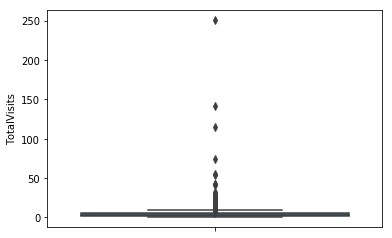

In [63]:
sns.boxplot(leads.TotalVisits, orient='v')
plt.show()

#### We will drop row with outliers for TotalVisits

In [64]:
Q1 = leads.TotalVisits.quantile(0.25)
Q3 = leads.TotalVisits.quantile(0.75)
IQR = Q3 - Q1
leads = leads[(leads.TotalVisits>= Q1 - 3*IQR) & (leads.TotalVisits <= Q3 + 3*IQR)]

In [65]:
leads.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,DoNotEmail,Converted,TotalVisits,TimeOnWebsite,PageViewsPerVisit,GetTheInterview
count,6929.000000,6929.000000,6929.000000,6929.000000,6929.000000,6929.000000
mean,0.083562,0.383172,4.010391,610.672824,2.977428,0.404820
std,0.276750,0.486195,2.596611,545.146996,1.832374,0.490893
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,151.000000,2.000000,0.000000
50%,0.000000,0.000000,3.000000,376.000000,2.500000,0.000000
75%,0.000000,1.000000,5.000000,1085.000000,4.000000,1.000000
90%,0.000000,1.000000,8.000000,1446.000000,5.000000,1.000000
95%,1.000000,1.000000,9.000000,1602.000000,6.000000,1.000000
99%,1.000000,1.000000,13.000000,1858.000000,9.000000,1.000000


#### Dropping outliers for PageViewsPerVisit

In [66]:
Q1 = leads.PageViewsPerVisit.quantile(0.25)
Q3 = leads.PageViewsPerVisit.quantile(0.75)
IQR = Q3 - Q1
leads = leads[(leads.PageViewsPerVisit>= Q1 - 3*IQR) & (leads.PageViewsPerVisit <= Q3 + 3*IQR)]

In [67]:
leads.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,DoNotEmail,Converted,TotalVisits,TimeOnWebsite,PageViewsPerVisit,GetTheInterview
count,6892.000000,6892.000000,6892.000000,6892.000000,6892.000000,6892.000000
mean,0.083430,0.382908,3.966773,609.984475,2.928265,0.404092
std,0.276551,0.486131,2.532545,544.978033,1.707176,0.490751
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,151.000000,2.000000,0.000000
50%,0.000000,0.000000,3.000000,375.500000,2.500000,0.000000
75%,0.000000,1.000000,5.000000,1083.000000,4.000000,1.000000
90%,0.000000,1.000000,7.000000,1445.000000,5.000000,1.000000
95%,1.000000,1.000000,9.000000,1602.000000,6.000000,1.000000
99%,1.000000,1.000000,13.000000,1858.090000,8.000000,1.000000


## Exploring Categorical Values

In [68]:
leads.head()

,LeadOrigin,LeadSource,DoNotEmail,Converted,TotalVisits,TimeOnWebsite,PageViewsPerVisit,LastActivity,Country,Specialization,Occupation,KeyDriver,LeadQuality,GetTheInterview,LastNotableActivity
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,India,None,Unemployed,Better Career Prospects,Not Sure,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,Might be,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,Not Sure,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,India,None,Unemployed,Better Career Prospects,Might be,0,Modified
6,Landing Page Submission,Google,0,1,2.0,1640,2.0,Email Opened,India,Supply Chain Management,Unemployed,Better Career Prospects,Low in Relevance,0,Modified


### Exploring LeadSource

In [69]:
leads.LeadSource.value_counts()

Google               2823
Direct Traffic       2476
Organic Search       1085
Reference             161
Olark Chat            161
Referral Sites        115
Facebook               28
Welingak Website       19
bing                    6
google                  5
Click2call              3
Social Media            2
Pay per Click Ads       1
NC_EDM                  1
testone                 1
welearnblog_Home        1
WeLearn                 1
youtubechannel          1
blog                    1
Press_Release           1
Name: LeadSource, dtype: int64

#### Lets merge google and Google 
#### Also, for some levels (Welingak Website and below) are very small. We can club them together as 'Other'

In [70]:
leads.LeadSource.replace({'google':'Google'},inplace=True)

In [71]:
leads.LeadSource.replace(['Welingak Website','Click2call','bing','Social Media',
                          'NC_EDM','youtubechannel','blog','Press_Release','WeLearn',
                          'Pay per Click Ads','testone','welearnblog_Home'],
              'Other', 
              inplace=True)

In [72]:
leads.LeadSource.value_counts()

Google            2828
Direct Traffic    2476
Organic Search    1085
Olark Chat         161
Reference          161
Referral Sites     115
Other               38
Facebook            28
Name: LeadSource, dtype: int64

### Exploring KeyDriver

In [73]:
leads.KeyDriver.value_counts()

Better Career Prospects      5069
Missing                      1821
Flexibility & Convenience       1
Other                           1
Name: KeyDriver, dtype: int64

#### There are two levels with 1 count each. We will merge it into Missing and call this level 'Other'

In [74]:
leads.KeyDriver.replace({'Flexibility & Convenience':'Other','Missing':'Other'}, inplace=True)

### Exploring LastActivity and LastNotableActivity

In [75]:
leads.LastActivity.value_counts()

Email Opened                    2764
SMS Sent                        2125
Page Visited on Website          541
Converted to Lead                425
Olark Chat Conversation          322
Email Bounced                    261
Email Link Clicked               174
Form Submitted on Website        111
Unreachable                       82
Unsubscribed                      52
Had a Phone Conversation          24
View in browser link Clicked       4
Approached upfront                 3
Email Received                     2
Visited Booth in Tradeshow         1
Email Marked Spam                  1
Name: LastActivity, dtype: int64

In [76]:
leads.LastNotableActivity.value_counts()

Modified                        2358
Email Opened                    2304
SMS Sent                        1676
Page Visited on Website          247
Email Link Clicked               107
Olark Chat Conversation           67
Email Bounced                     48
Unsubscribed                      39
Unreachable                       28
Had a Phone Conversation          13
Approached upfront                 1
Email Marked Spam                  1
Email Received                     1
View in browser link Clicked       1
Form Submitted on Website          1
Name: LastNotableActivity, dtype: int64

In [77]:
pd.crosstab(leads.LastActivity,leads.LastNotableActivity).apply(lambda r:round(r/r.sum()*100,2), axis=1)

LastNotableActivity,Approached upfront,Email Bounced,Email Link Clicked,Email Marked Spam,Email Opened,Email Received,Form Submitted on Website,Had a Phone Conversation,Modified,Olark Chat Conversation,Page Visited on Website,SMS Sent,Unreachable,Unsubscribed,View in browser link Clicked
LastActivity,,,,,,,,,,,,,,,
Approached upfront,33.33,0.00,0.00,0.0,0.00,0.0,0.0,0.00,66.67,0.00,0.00,0.00,0.00,0.0,0.0
Converted to Lead,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00,0.0,0.0
Email Bounced,0.00,18.39,0.00,0.0,0.00,0.0,0.0,0.00,81.61,0.00,0.00,0.00,0.00,0.0,0.0
Email Link Clicked,0.00,0.00,61.49,0.0,0.00,0.0,0.0,0.00,38.51,0.00,0.00,0.00,0.00,0.0,0.0
Email Marked Spam,0.00,0.00,0.00,100.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
Email Opened,0.00,0.00,0.00,0.0,83.36,0.0,0.0,0.00,16.64,0.00,0.00,0.00,0.00,0.0,0.0
Email Received,0.00,0.00,0.00,0.0,0.00,50.0,0.0,0.00,50.00,0.00,0.00,0.00,0.00,0.0,0.0
Form Submitted on Website,0.00,0.00,0.00,0.0,0.00,0.0,0.9,0.00,99.10,0.00,0.00,0.00,0.00,0.0,0.0
Had a Phone Conversation,0.00,0.00,0.00,0.0,0.00,0.0,0.0,54.17,45.83,0.00,0.00,0.00,0.00,0.0,0.0


### The two variables are clearly correlated. It seems that  values in LastNotableActivity are either same as that in LastActivity or 'Modified'. It seems that values captured in LastActivity were updated to LastNotableActivity as Modified. Hence, we will keep latter

In [78]:
leads.drop('LastActivity', axis=1,inplace=True)

In [79]:
leads.LastNotableActivity.value_counts()

Modified                        2358
Email Opened                    2304
SMS Sent                        1676
Page Visited on Website          247
Email Link Clicked               107
Olark Chat Conversation           67
Email Bounced                     48
Unsubscribed                      39
Unreachable                       28
Had a Phone Conversation          13
Approached upfront                 1
Email Marked Spam                  1
Email Received                     1
View in browser link Clicked       1
Form Submitted on Website          1
Name: LastNotableActivity, dtype: int64

#### Again, we will convert levels with low counts to 'Other'

In [80]:
leads.LastNotableActivity.replace(['Had a Phone Conversation','Approached upfront', 'Email Marked Spam', 'Email Received',
'View in browser link Clicked'],'Other',inplace=True)

### Exploring Specialization

In [81]:
leads.Specialization.value_counts()

None                                 1535
Finance Management                    901
Human Resource Management             758
Marketing Management                  735
Operations Management                 466
Business Administration               372
IT Projects Management                350
Supply Chain Management               325
Banking, Investment And Insurance     298
Media and Advertising                 196
Travel and Tourism                    187
International Business                168
Healthcare Management                 140
Hospitality Management                106
E-COMMERCE                            105
Retail Management                      92
Rural and Agribusiness                 65
E-Business                             56
Services Excellence                    37
Name: Specialization, dtype: int64

### Exploring Occupation

In [82]:
leads.Occupation.value_counts()

Unemployed              4422
Missing                 1803
Working Professional     488
Student                  153
Other                     12
Housewife                  8
Businessman                6
Name: Occupation, dtype: int64

In [83]:
# changing low count values to other
leads.Occupation.replace(['Housewife','Businessman'],'Other',inplace=True)

### Exploring LeadQuality

In [84]:
leads.LeadQuality.value_counts()

Not Sure             4213
Might be             1206
Low in Relevance      504
High in Relevance     493
Worst                 476
Name: LeadQuality, dtype: int64

In [85]:
#saving a copy of leads datafame
leads_copy=leads.copy()
leads.head()

,LeadOrigin,LeadSource,DoNotEmail,Converted,TotalVisits,TimeOnWebsite,PageViewsPerVisit,Country,Specialization,Occupation,KeyDriver,LeadQuality,GetTheInterview,LastNotableActivity
1,API,Organic Search,0,0,5.0,674,2.5,India,None,Unemployed,Better Career Prospects,Not Sure,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,India,Business Administration,Student,Better Career Prospects,Might be,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,India,Media and Advertising,Unemployed,Better Career Prospects,Not Sure,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,India,None,Unemployed,Better Career Prospects,Might be,0,Modified
6,Landing Page Submission,Google,0,1,2.0,1640,2.0,India,Supply Chain Management,Unemployed,Better Career Prospects,Low in Relevance,0,Modified


## Generate dummies

In [86]:
# We will create dummy variables for the categorical data. In columns with 'Other' or equivalent level, we will drop 'Other'
dummy_col_with_other = ['LeadSource','Country','Occupation','LastNotableActivity','KeyDriver']
dummy_col_without_other = ['LeadOrigin','DoNotEmail','Specialization','LeadQuality']

In [87]:
dummy_1 = pd.get_dummies(leads[dummy_col_with_other])

In [88]:
for col in dummy_col_with_other:
    dummy_1.drop(col+'_Other', axis=1,inplace=True,errors='ignore')

In [89]:
dummy_1.drop('Country_Non-India',axis=1,inplace=True)

In [90]:
dummy_1.head()

,LeadSource_Direct Traffic,LeadSource_Facebook,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Reference,LeadSource_Referral Sites,Country_India,Occupation_Missing,Occupation_Student,...,LastNotableActivity_Email Link Clicked,LastNotableActivity_Email Opened,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,KeyDriver_Better Career Prospects
1,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
6,0,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [91]:
dummy_2 =pd.get_dummies(leads[dummy_col_without_other],drop_first=True)

In [92]:
leads.drop(dummy_col_with_other,axis=1,inplace=True)
leads.drop(dummy_col_without_other,axis=1,inplace=True)


In [93]:
leads_final = pd.concat([leads,dummy_1,dummy_2],axis=1)

In [94]:
leads_final.head()

,Converted,TotalVisits,TimeOnWebsite,PageViewsPerVisit,GetTheInterview,LeadSource_Direct Traffic,LeadSource_Facebook,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,...,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,LeadQuality_Low in Relevance,LeadQuality_Might be,LeadQuality_Not Sure,LeadQuality_Worst
1,0,5.0,674,2.5,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,1,2.0,1532,2.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,2.0,1428,1.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
6,1,2.0,1640,2.0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0


## Checking Correlations

In [95]:
leads_x = leads_final.drop('Converted',axis=1)

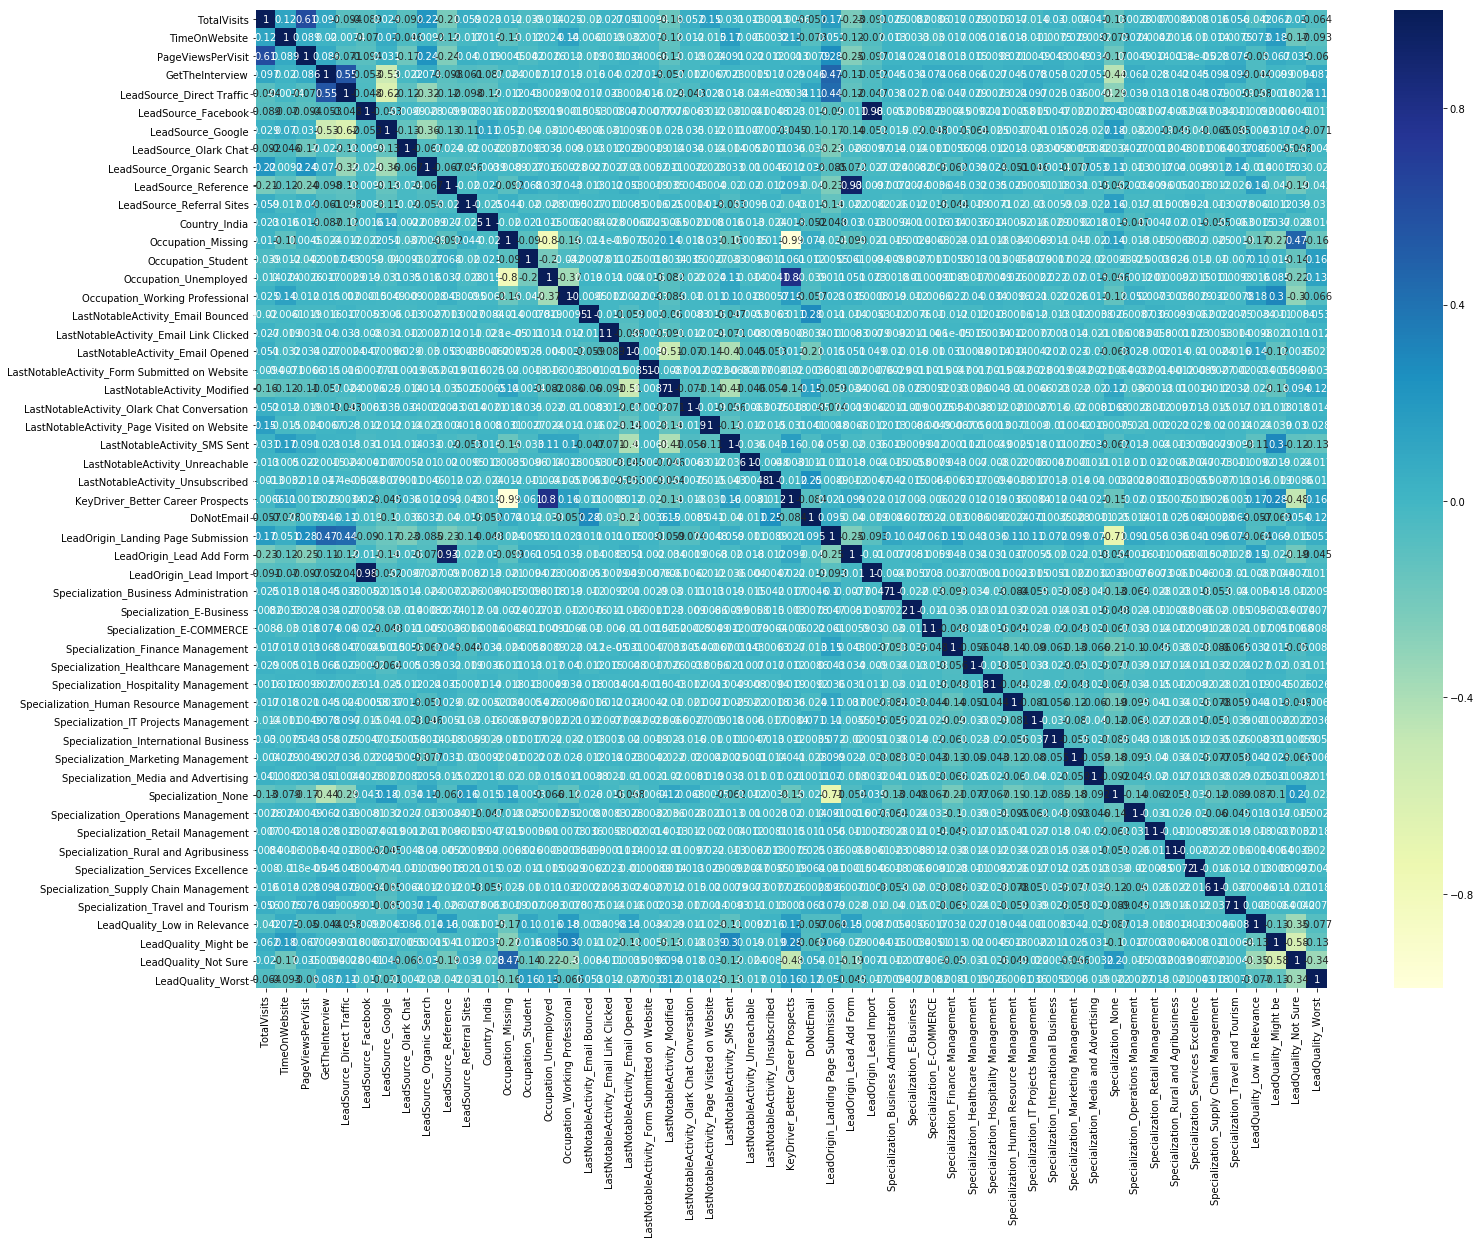

In [96]:
plt.figure(figsize=(24,18))
sns.heatmap(leads_x.corr(),cmap='YlGnBu',annot=True)
plt.show()

In [97]:
leads_x.corr()

,TotalVisits,TimeOnWebsite,PageViewsPerVisit,GetTheInterview,LeadSource_Direct Traffic,LeadSource_Facebook,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Reference,...,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,LeadQuality_Low in Relevance,LeadQuality_Might be,LeadQuality_Not Sure,LeadQuality_Worst
TotalVisits,1.000000,0.121243,0.606248,0.097325,-0.093595,-0.089237,0.029000,-0.092046,0.218525,-0.214570,...,0.002849,0.007018,0.008394,0.008021,0.016164,0.055795,-0.042311,0.062441,0.019628,-0.064215
TimeOnWebsite,0.121243,1.000000,0.089107,0.020361,-0.007376,-0.069550,0.069759,-0.046018,0.009170,-0.119798,...,0.023586,0.004159,0.001639,-0.010142,0.014175,0.007547,0.072916,0.177764,-0.174543,-0.093337
PageViewsPerVisit,0.606248,0.089107,1.000000,0.085614,-0.071080,-0.093526,0.031224,-0.169827,0.237217,-0.238716,...,0.004918,0.014435,-0.003366,-0.000018,0.027754,0.075871,-0.049774,0.066904,0.035498,-0.060068
GetTheInterview,0.097325,0.020361,0.085614,1.000000,0.553711,-0.052595,-0.528839,-0.021648,0.073522,-0.097994,...,0.062053,0.027886,0.042014,0.044707,0.094394,0.099067,-0.043910,0.009856,-0.009365,0.087052
LeadSource_Direct Traffic,-0.093595,-0.007376,-0.071080,0.553711,1.000000,-0.047825,-0.624631,-0.115807,-0.323668,-0.115807,...,0.039249,0.013040,0.017673,0.048452,0.078813,-0.005921,-0.058156,-0.001802,0.002761,0.114489
LeadSource_Facebook,-0.089237,-0.069550,-0.093526,-0.052595,-0.047825,1.000000,-0.053279,-0.009878,-0.027608,-0.009878,...,-0.008115,-0.007429,-0.006232,-0.004692,-0.003448,-0.010666,-0.009179,0.000603,0.004136,-0.017396
LeadSource_Google,0.029000,0.069759,0.031224,-0.528839,-0.624631,-0.053279,1.000000,-0.129014,-0.360580,-0.129014,...,-0.031971,-0.001929,-0.044775,-0.041102,-0.064510,-0.084844,-0.004313,0.017189,0.045552,-0.071331
LeadSource_Olark Chat,-0.092046,-0.046018,-0.169827,-0.021648,-0.115807,-0.009878,-0.129014,1.000000,-0.066852,-0.023919,...,0.027217,-0.001249,0.004786,-0.011362,0.006380,0.003734,0.085699,-0.005493,-0.067825,-0.004241
LeadSource_Organic Search,0.218525,0.009170,0.237217,0.073522,-0.323668,-0.027608,-0.360580,-0.066852,1.000000,-0.066852,...,-0.013268,-0.001678,0.040258,-0.009949,-0.011586,0.136239,-0.014299,0.000148,0.030037,-0.020325
LeadSource_Reference,-0.214570,-0.119798,-0.238716,-0.097994,-0.115807,-0.009878,-0.129014,-0.023919,-0.066852,1.000000,...,-0.003390,-0.009619,-0.005152,0.001783,-0.011747,-0.025828,0.159494,-0.040888,-0.186064,-0.042125


In [98]:
# Dropping columns with high correlations
drop_cols= ['LeadOrigin_Lead Add Form','LeadSource_Facebook']
leads_final.drop(drop_cols,axis=1,inplace=True)

## Train-Test Split

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
y = leads_final.loc[:,'Converted']
X = leads_final.drop('Converted',axis=1)

In [101]:
X_train, X_test,y_train,y_test = train_test_split(X,y,train_size=0.7, test_size=0.3, random_state=100)

In [102]:
X_train.head()

,TotalVisits,TimeOnWebsite,PageViewsPerVisit,GetTheInterview,LeadSource_Direct Traffic,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Reference,LeadSource_Referral Sites,...,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,LeadQuality_Low in Relevance,LeadQuality_Might be,LeadQuality_Not Sure,LeadQuality_Worst
1462,6.0,1152,3.0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
6243,1.0,1397,1.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2850,4.0,20,4.0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4903,12.0,150,3.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2717,3.0,95,3.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Feature Scaling

In [103]:
from sklearn.preprocessing import StandardScaler

In [104]:
scaler = StandardScaler()
X_train.iloc[:,:] = scaler.fit_transform(X_train)
X_test.iloc[:,:] = scaler.transform(X_test)
X_test.head()

C:\Users\Sumit\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,TotalVisits,TimeOnWebsite,PageViewsPerVisit,GetTheInterview,LeadSource_Direct Traffic,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Reference,LeadSource_Referral Sites,...,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,LeadQuality_Low in Relevance,LeadQuality_Might be,LeadQuality_Not Sure,LeadQuality_Worst
2603,0.026114,1.180245,0.652964,1.237318,-0.746414,-0.840478,-0.156273,2.312438,-0.147707,-0.127361,...,-0.271422,-0.120462,-0.09812,-0.075023,-0.222216,6.131232,-0.284832,-0.458846,0.792515,-0.270099
3756,-0.372544,-0.614842,0.053272,1.237318,-0.746414,-0.840478,-0.156273,2.312438,-0.147707,-0.127361,...,-0.271422,-0.120462,-0.09812,-0.075023,-0.222216,6.131232,-0.284832,-0.458846,0.792515,-0.270099
5216,0.424773,-0.501043,1.252656,1.237318,1.339739,-0.840478,-0.156273,-0.432444,-0.147707,-0.127361,...,-0.271422,-0.120462,-0.09812,-0.075023,-0.222216,-0.163099,-0.284832,-0.458846,0.792515,-0.270099
8832,1.620747,-0.523069,-0.144626,1.237318,-0.746414,-0.840478,-0.156273,2.312438,-0.147707,-0.127361,...,-0.271422,-0.120462,-0.09812,-0.075023,-0.222216,6.131232,-0.284832,-0.458846,0.792515,-0.270099
4644,0.424773,-0.869972,1.252656,-0.808200,1.339739,-0.840478,-0.156273,-0.432444,-0.147707,-0.127361,...,-0.271422,-0.120462,-0.09812,-0.075023,-0.222216,-0.163099,-0.284832,-0.458846,-1.261806,3.702339


In [105]:
# Checking for Conversion Rate
leads_final.Converted.mean()

0.3829077190946024

#### Data does not seem to be too imbalanced

## Model Building

In [106]:
import statsmodels.api as sm

C:\Users\Sumit\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [107]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4824
Model:                            GLM   Df Residuals:                     4772
Model Family:                Binomial   Df Model:                           51
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -1667.8
Date:                Sun, 03 Mar 2019   Deviance:                       3335.6
Time:                        19:49:20   Pearson chi2:                 4.83e+03
No. Iterations:                    22                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.7559     77.814     -0.010      0.992    -153.268     151.756
TotalVisits                                       0.3277      0.056      5.815      0.000       0.217       0.438
TimeOnWebsite                                     1.0663      0.047     22.900      0.000       0.975       1.158
PageViewsPerVisit                                -0.2796      0.060     -4.691      0.000      -0.396      -0.163
GetTheInterview                                   0.0206      0.062      0.332      0.740      -0.101       0.142
LeadSource_Direct Traffic                        -0.7601      0.252     -3.020      0.003      -1.253      -0.267
LeadSource_Google                                -0.6914      0.255     -2.708      0.007      -1.192      -0.191
LeadSource_Olark Chat                            -0.1204      0.088     -1.365      0.172      -0.293       0.052
LeadSource_Organic Search                        -0.5638      0.193     -2.922      0.003      -0.942      -0.186
LeadSource_Reference                              0.1577      0.111      1.418      0.156      -0.060       0.376
LeadSource_Referral Sites                        -0.2943      0.081     -3.637      0.000      -0.453      -0.136
Country_India                                     0.0545      0.047      1.160      0.246      -0.038       0.147
Occupation_Missing                                8.9228   8424.282      0.001      0.999   -1.65e+04    1.65e+04
Occupation_Student                               -0.0320      0.109     -0.292      0.770      -0.247       0.183
Occupation_Unemployed                            -0.1379      0.321     -0.430      0.667      -0.766       0.490
Occupation_Working Professional                   0.4084      0.182      2.240      0.025       0.051       0.766
LastNotableActivity_Email Bounced                -1.9086   1590.555     -0.001      0.999   -3119.339    3115.521
LastNotableActivity_Email Link Clicked           -2.7169   2289.573     -0.001      0.999   -4490.197    4484.764
LastNotableActivity_Email Opened                -10.6765   8966.946     -0.001      0.999   -1.76e+04    1.76e+04
LastNotableActivity_Form Submitted on Website    -0.6274   1176.250     -0.001      1.000   -2306.036    2304.781
LastNotableActivity_Modified                    -10.8885   9039.061     -0.001      0.999   -1.77e+04    1.77e+04
LastNotableActivity_Olark Chat Conversation      -2.2316   1807.514     -0.001      0.999   -3544.894    3540.431
LastNotableActivity_Page Visited on Website      -4.3222   3613.100     -0.001      0.999   -7085.869    7077.224
LastNotableActivity_SMS Sent                     -9.0362   8132.632     -0.001      0.999   -1.59e+04    1.59e+04
LastNotableActivity_Unreachable                  -1.1163   1058.557     -0.001      

## Feature Selection Using RFE

In [108]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [109]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 25)            
rfe = rfe.fit(X_train, y_train)

In [110]:
rfe.support_

array([ True,  True,  True, False,  True,  True, False,  True,  True,
        True, False,  True, False, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True, False, False,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True,  True,  True,  True], dtype=bool)

In [111]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

col = X_train.columns[rfe.support_]
col
#X_train.columns[~rfe.support_]

Index(['TotalVisits', 'TimeOnWebsite', 'PageViewsPerVisit',
       'LeadSource_Direct Traffic', 'LeadSource_Google',
       'LeadSource_Organic Search', 'LeadSource_Reference',
       'LeadSource_Referral Sites', 'Occupation_Missing',
       'Occupation_Working Professional', 'LastNotableActivity_Email Bounced',
       'LastNotableActivity_Email Link Clicked',
       'LastNotableActivity_Email Opened', 'LastNotableActivity_Modified',
       'LastNotableActivity_Olark Chat Conversation',
       'LastNotableActivity_Page Visited on Website',
       'LastNotableActivity_SMS Sent', 'KeyDriver_Better Career Prospects',
       'DoNotEmail', 'LeadOrigin_Landing Page Submission',
       'Specialization_None', 'LeadQuality_Low in Relevance',
       'LeadQuality_Might be', 'LeadQuality_Not Sure', 'LeadQuality_Worst'],
      dtype='object')

##### Assessing the model with StatsModels

In [112]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4824
Model:                            GLM   Df Residuals:                     4798
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -1679.2
Date:                Sun, 03 Mar 2019   Deviance:                       3358.4
Time:                        19:49:25   Pearson chi2:                 4.91e+03
No. Iterations:                    21                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                          -0.8007     36.019     -0.022      0.982     -71.397      69.796
TotalVisits                                     0.3265      0.056      5.873      0.000       0.218       0.435
TimeOnWebsite                                   1.0599      0.046     22.926      0.000       0.969       1.151
PageViewsPerVisit                              -0.2712      0.059     -4.622      0.000      -0.386      -0.156
LeadSource_Direct Traffic                      -0.4172      0.128     -3.249      0.001      -0.669      -0.166
LeadSource_Google                              -0.3497      0.126     -2.783      0.005      -0.596      -0.103
LeadSource_Organic Search                      -0.3076      0.101     -3.038      0.002      -0.506      -0.109
LeadSource_Reference                            0.2548      0.087      2.922      0.003       0.084       0.426
LeadSource_Referral Sites                      -0.2082      0.057     -3.623      0.000      -0.321      -0.096
Occupation_Missing                              8.5828   5095.121      0.002      0.999   -9977.671    9994.837
Occupation_Working Professional                 0.4681      0.062      7.552      0.000       0.347       0.590
LastNotableActivity_Email Bounced              -0.1521      0.066     -2.288      0.022      -0.282      -0.022
LastNotableActivity_Email Link Clicked         -0.1955      0.068     -2.858      0.004      -0.330      -0.061
LastNotableActivity_Email Opened               -0.7952      0.212     -3.743      0.000      -1.212      -0.379
LastNotableActivity_Modified                   -0.9206      0.214     -4.309      0.000      -1.339      -0.502
LastNotableActivity_Olark Chat Conversation    -0.2377      0.064     -3.700      0.000      -0.364      -0.112
LastNotableActivity_Page Visited on Website    -0.3367      0.096     -3.513      0.000      -0.525      -0.149
LastNotableActivity_SMS Sent                   -0.0733      0.192     -0.382      0.702      -0.449       0.302
KeyDriver_Better Career Prospects               8.6923   5114.428      0.002      0.999      -1e+04       1e+04
DoNotEmail                                     -0.4128      0.069     -5.989      0.000      -0.548      -0.278
LeadOrigin_Landing Page Submission             -0.2654      0.080     -3.320      0.001      -0.422      -0.109
Specialization_None                            -0.1628      0.073     -2.221      0.026      -0.306      -0.019
LeadQuality_Low in Relevance                   -0.2586      0.075     -3.443      0.001      -0.406      -0.111
LeadQuality_Might be                           -0.7241      0.099     -7.349      0.000      -0.917      -0.531
LeadQuality_Not Sure                           -1.7549      0.123    -14.288      0.000      -1.996      -1.514
LeadQuality_Worst         

### Some p-values are high and would need to be handles

In [113]:
# Getting the predicted values on the train set
y_train_pred = round(res.predict(X_train_sm)*100,2)
y_train_pred[:10]

1462    72.87
6243    99.97
2850     0.41
4903    17.93
2717     4.52
2209     5.42
3923    98.40
3097    94.71
6166    54.59
54       9.18
dtype: float64

In [114]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([ 72.87,  99.97,   0.41,  17.93,   4.52,   5.42,  98.4 ,  94.71,
        54.59,   9.18])

##### Creating a dataframe with the actual conversion flag and the predicted probabilities

In [115]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'LeadScore':y_train_pred})
y_train_pred_final['LeadNumber'] = y_train.index
y_train_pred_final.head()

,Converted,LeadScore,LeadNumber
0,0,72.87,1462
1,1,99.97,6243
2,0,0.41,2850
3,0,17.93,4903
4,0,4.52,2717


##### Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0

In [116]:
y_train_pred_final['predicted'] = y_train_pred_final.LeadScore.map(lambda x: 1 if x > 50 else 0)

In [117]:
# Let's see the head
y_train_pred_final.head()

,Converted,LeadScore,LeadNumber,predicted
0,0,72.87,1462,1
1,1,99.97,6243,1
2,0,0.41,2850,0
3,0,17.93,4903,0
4,0,4.52,2717,0


In [118]:
from sklearn import metrics

In [119]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[2658  310]
 [ 435 1421]]


In [120]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.84556384743


#### Checking VIFs

In [121]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [122]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,KeyDriver_Better Career Prospects,66.85
8,Occupation_Missing,66.20
13,LastNotableActivity_Modified,21.17
12,LastNotableActivity_Email Opened,21.14
16,LastNotableActivity_SMS Sent,17.47
3,LeadSource_Direct Traffic,9.93
4,LeadSource_Google,9.69
5,LeadSource_Organic Search,6.13
23,LeadQuality_Not Sure,4.81
15,LastNotableActivity_Page Visited on Website,4.29


### Let's drop variables with high VIF one at a time

In [123]:
col = col.drop('KeyDriver_Better Career Prospects', 1)
col

Index(['TotalVisits', 'TimeOnWebsite', 'PageViewsPerVisit',
       'LeadSource_Direct Traffic', 'LeadSource_Google',
       'LeadSource_Organic Search', 'LeadSource_Reference',
       'LeadSource_Referral Sites', 'Occupation_Missing',
       'Occupation_Working Professional', 'LastNotableActivity_Email Bounced',
       'LastNotableActivity_Email Link Clicked',
       'LastNotableActivity_Email Opened', 'LastNotableActivity_Modified',
       'LastNotableActivity_Olark Chat Conversation',
       'LastNotableActivity_Page Visited on Website',
       'LastNotableActivity_SMS Sent', 'DoNotEmail',
       'LeadOrigin_Landing Page Submission', 'Specialization_None',
       'LeadQuality_Low in Relevance', 'LeadQuality_Might be',
       'LeadQuality_Not Sure', 'LeadQuality_Worst'],
      dtype='object')

In [124]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4824
Model:                            GLM   Df Residuals:                     4799
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -1680.1
Date:                Sun, 03 Mar 2019   Deviance:                       3360.2
Time:                        19:49:27   Pearson chi2:                 4.91e+03
No. Iterations:                     7                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                          -0.7426      0.053    -13.929      0.000      -0.847      -0.638
TotalVisits                                     0.3263      0.056      5.867      0.000       0.217       0.435
TimeOnWebsite                                   1.0610      0.046     22.942      0.000       0.970       1.152
PageViewsPerVisit                              -0.2710      0.059     -4.617      0.000      -0.386      -0.156
LeadSource_Direct Traffic                      -0.4133      0.128     -3.218      0.001      -0.665      -0.162
LeadSource_Google                              -0.3437      0.126     -2.736      0.006      -0.590      -0.097
LeadSource_Organic Search                      -0.3026      0.101     -2.991      0.003      -0.501      -0.104
LeadSource_Reference                            0.2544      0.087      2.914      0.004       0.083       0.426
LeadSource_Referral Sites                      -0.2064      0.057     -3.592      0.000      -0.319      -0.094
Occupation_Missing                             -0.0742      0.049     -1.502      0.133      -0.171       0.023
Occupation_Working Professional                 0.4624      0.061      7.558      0.000       0.342       0.582
LastNotableActivity_Email Bounced              -0.1534      0.066     -2.319      0.020      -0.283      -0.024
LastNotableActivity_Email Link Clicked         -0.1958      0.068     -2.859      0.004      -0.330      -0.062
LastNotableActivity_Email Opened               -0.7964      0.213     -3.745      0.000      -1.213      -0.380
LastNotableActivity_Modified                   -0.9242      0.214     -4.321      0.000      -1.343      -0.505
LastNotableActivity_Olark Chat Conversation    -0.2381      0.064     -3.703      0.000      -0.364      -0.112
LastNotableActivity_Page Visited on Website    -0.3382      0.096     -3.528      0.000      -0.526      -0.150
LastNotableActivity_SMS Sent                   -0.0737      0.192     -0.384      0.701      -0.450       0.302
DoNotEmail                                     -0.4148      0.069     -6.028      0.000      -0.550      -0.280
LeadOrigin_Landing Page Submission             -0.2745      0.079     -3.454      0.001      -0.430      -0.119
Specialization_None                            -0.1732      0.073     -2.386      0.017      -0.316      -0.031
LeadQuality_Low in Relevance                   -0.2582      0.075     -3.436      0.001      -0.405      -0.111
LeadQuality_Might be                           -0.7231      0.099     -7.337      0.000      -0.916      -0.530
LeadQuality_Not Sure                           -1.7567      0.123    -14.298      0.000      -1.997      -1.516
LeadQuality_Worst                              -1.4382      0.118    -12.238      0.000      -1.669      -1.208
==========================

#### p-value of Occupation_Missing and Specialization_None are high

In [125]:
y_train_pred = round(res.predict(X_train_sm)*100,2).values.reshape(-1)

In [126]:
y_train_pred[:10]

array([ 73.  ,  99.97,   0.41,  17.89,   4.49,   5.4 ,  98.41,  94.61,
        54.51,   9.17])

In [127]:
y_train_pred_final['LeadScore'] = y_train_pred

In [128]:
# Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.LeadScore.map(lambda x: 1 if x > 50 else 0)
y_train_pred_final.head()

,Converted,LeadScore,LeadNumber,predicted
0,0,73.00,1462,1
1,1,99.97,6243,1
2,0,0.41,2850,0
3,0,17.89,4903,0
4,0,4.49,2717,0


In [129]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.84556384743


In [130]:
##### Let's check the VIFs again

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,LastNotableActivity_Modified,21.16
12,LastNotableActivity_Email Opened,21.14
16,LastNotableActivity_SMS Sent,17.47
3,LeadSource_Direct Traffic,9.92
4,LeadSource_Google,9.65
5,LeadSource_Organic Search,6.11
22,LeadQuality_Not Sure,4.81
15,LastNotableActivity_Page Visited on Website,4.29
21,LeadQuality_Might be,3.30
18,LeadOrigin_Landing Page Submission,3.18


#### VIFs are still High. Let's drop LastNotableActivity_Modified

In [131]:
col = col.drop('LastNotableActivity_Modified', 1)
col

Index(['TotalVisits', 'TimeOnWebsite', 'PageViewsPerVisit',
       'LeadSource_Direct Traffic', 'LeadSource_Google',
       'LeadSource_Organic Search', 'LeadSource_Reference',
       'LeadSource_Referral Sites', 'Occupation_Missing',
       'Occupation_Working Professional', 'LastNotableActivity_Email Bounced',
       'LastNotableActivity_Email Link Clicked',
       'LastNotableActivity_Email Opened',
       'LastNotableActivity_Olark Chat Conversation',
       'LastNotableActivity_Page Visited on Website',
       'LastNotableActivity_SMS Sent', 'DoNotEmail',
       'LeadOrigin_Landing Page Submission', 'Specialization_None',
       'LeadQuality_Low in Relevance', 'LeadQuality_Might be',
       'LeadQuality_Not Sure', 'LeadQuality_Worst'],
      dtype='object')

In [132]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4824
Model:                            GLM   Df Residuals:                     4800
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -1689.1
Date:                Sun, 03 Mar 2019   Deviance:                       3378.1
Time:                        19:49:29   Pearson chi2:                 4.94e+03
No. Iterations:                     7                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                          -0.7358      0.053    -13.855      0.000      -0.840      -0.632
TotalVisits                                     0.3269      0.055      5.893      0.000       0.218       0.436
TimeOnWebsite                                   1.0557      0.046     22.948      0.000       0.966       1.146
PageViewsPerVisit                              -0.2628      0.059     -4.490      0.000      -0.377      -0.148
LeadSource_Direct Traffic                      -0.4231      0.129     -3.293      0.001      -0.675      -0.171
LeadSource_Google                              -0.3490      0.126     -2.777      0.005      -0.595      -0.103
LeadSource_Organic Search                      -0.3117      0.101     -3.082      0.002      -0.510      -0.113
LeadSource_Reference                            0.2522      0.087      2.884      0.004       0.081       0.424
LeadSource_Referral Sites                      -0.2073      0.058     -3.591      0.000      -0.321      -0.094
Occupation_Missing                             -0.0723      0.049     -1.465      0.143      -0.169       0.024
Occupation_Working Professional                 0.4562      0.061      7.479      0.000       0.337       0.576
LastNotableActivity_Email Bounced              -0.0099      0.058     -0.171      0.864      -0.123       0.104
LastNotableActivity_Email Link Clicked          0.0322      0.044      0.736      0.462      -0.054       0.118
LastNotableActivity_Email Opened                0.0950      0.052      1.817      0.069      -0.007       0.197
LastNotableActivity_Olark Chat Conversation    -0.0585      0.049     -1.192      0.233      -0.155       0.038
LastNotableActivity_Page Visited on Website     0.0195      0.049      0.398      0.691      -0.076       0.115
LastNotableActivity_SMS Sent                    0.7303      0.050     14.564      0.000       0.632       0.829
DoNotEmail                                     -0.3650      0.066     -5.501      0.000      -0.495      -0.235
LeadOrigin_Landing Page Submission             -0.2699      0.079     -3.408      0.001      -0.425      -0.115
Specialization_None                            -0.1745      0.072     -2.412      0.016      -0.316      -0.033
LeadQuality_Low in Relevance                   -0.2646      0.075     -3.538      0.000      -0.411      -0.118
LeadQuality_Might be                           -0.7287      0.098     -7.425      0.000      -0.921      -0.536
LeadQuality_Not Sure                           -1.7713      0.122    -14.471      0.000      -2.011      -1.531
LeadQuality_Worst                              -1.4472      0.117    -12.340      0.000      -1.677      -1.217
===============================================================================================================
"""

#### p-value for a few variables are high

In [133]:
y_train_pred = round(res.predict(X_train_sm)*100,2).values.reshape(-1)

In [134]:
y_train_pred_final['LeadScore'] = y_train_pred

In [135]:
# Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.LeadScore.map(lambda x: 1 if x > 50 else 0)
y_train_pred_final.head()

,Converted,LeadScore,LeadNumber,predicted
0,0,72.87,1462,1
1,1,99.97,6243,1
2,0,0.43,2850,0
3,0,18.05,4903,0
4,0,4.77,2717,0


In [136]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.844941956882


In [137]:
##### Let's check the VIFs again

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,LeadSource_Direct Traffic,9.92
4,LeadSource_Google,9.65
5,LeadSource_Organic Search,6.10
21,LeadQuality_Not Sure,4.79
20,LeadQuality_Might be,3.30
17,LeadOrigin_Landing Page Submission,3.18
18,Specialization_None,2.71
22,LeadQuality_Worst,2.12
19,LeadQuality_Low in Relevance,2.00
2,PageViewsPerVisit,1.81


#### VIFs are still  high. Let's drop LeadSource_Direct Traffic

In [138]:
col = col.drop('LeadSource_Direct Traffic', 1)
col

Index(['TotalVisits', 'TimeOnWebsite', 'PageViewsPerVisit',
       'LeadSource_Google', 'LeadSource_Organic Search',
       'LeadSource_Reference', 'LeadSource_Referral Sites',
       'Occupation_Missing', 'Occupation_Working Professional',
       'LastNotableActivity_Email Bounced',
       'LastNotableActivity_Email Link Clicked',
       'LastNotableActivity_Email Opened',
       'LastNotableActivity_Olark Chat Conversation',
       'LastNotableActivity_Page Visited on Website',
       'LastNotableActivity_SMS Sent', 'DoNotEmail',
       'LeadOrigin_Landing Page Submission', 'Specialization_None',
       'LeadQuality_Low in Relevance', 'LeadQuality_Might be',
       'LeadQuality_Not Sure', 'LeadQuality_Worst'],
      dtype='object')

In [139]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4824
Model:                            GLM   Df Residuals:                     4801
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -1694.5
Date:                Sun, 03 Mar 2019   Deviance:                       3388.9
Time:                        19:49:30   Pearson chi2:                 4.95e+03
No. Iterations:                     7                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                          -0.7287      0.053    -13.739      0.000      -0.833      -0.625
TotalVisits                                     0.3217      0.055      5.822      0.000       0.213       0.430
TimeOnWebsite                                   1.0402      0.046     22.807      0.000       0.951       1.130
PageViewsPerVisit                              -0.2826      0.058     -4.855      0.000      -0.397      -0.169
LeadSource_Google                               0.0299      0.051      0.588      0.556      -0.070       0.129
LeadSource_Organic Search                      -0.0264      0.052     -0.506      0.613      -0.129       0.076
LeadSource_Reference                            0.3237      0.086      3.776      0.000       0.156       0.492
LeadSource_Referral Sites                      -0.1134      0.050     -2.264      0.024      -0.212      -0.015
Occupation_Missing                             -0.0712      0.049     -1.448      0.148      -0.168       0.025
Occupation_Working Professional                 0.4513      0.061      7.390      0.000       0.332       0.571
LastNotableActivity_Email Bounced              -0.0129      0.058     -0.221      0.825      -0.127       0.101
LastNotableActivity_Email Link Clicked          0.0283      0.044      0.647      0.518      -0.057       0.114
LastNotableActivity_Email Opened                0.1010      0.052      1.936      0.053      -0.001       0.203
LastNotableActivity_Olark Chat Conversation    -0.0524      0.048     -1.091      0.275      -0.147       0.042
LastNotableActivity_Page Visited on Website     0.0184      0.049      0.376      0.707      -0.077       0.114
LastNotableActivity_SMS Sent                    0.7292      0.050     14.559      0.000       0.631       0.827
DoNotEmail                                     -0.3650      0.066     -5.518      0.000      -0.495      -0.235
LeadOrigin_Landing Page Submission             -0.3942      0.070     -5.613      0.000      -0.532      -0.257
Specialization_None                            -0.2572      0.068     -3.764      0.000      -0.391      -0.123
LeadQuality_Low in Relevance                   -0.2661      0.075     -3.555      0.000      -0.413      -0.119
LeadQuality_Might be                           -0.7383      0.098     -7.525      0.000      -0.931      -0.546
LeadQuality_Not Sure                           -1.7910      0.122    -14.645      0.000      -2.031      -1.551
LeadQuality_Worst                              -1.4660      0.117    -12.491      0.000      -1.696      -1.236
===============================================================================================================
"""

#### Some p-values remain high

In [140]:
y_train_pred = round(res.predict(X_train_sm)*100,2).values.reshape(-1)

In [141]:
y_train_pred_final['LeadScore'] = y_train_pred

In [142]:
# Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.LeadScore.map(lambda x: 1 if x > 50 else 0)
y_train_pred_final.head()

,Converted,LeadScore,LeadNumber,predicted
0,0,71.42,1462,1
1,1,99.96,6243,1
2,0,0.44,2850,0
3,0,17.42,4903,0
4,0,4.61,2717,0


In [143]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.843698175788


In [144]:
##### Let's check the VIFs again

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
20,LeadQuality_Not Sure,4.78
19,LeadQuality_Might be,3.30
16,LeadOrigin_Landing Page Submission,2.59
17,Specialization_None,2.48
21,LeadQuality_Worst,2.12
18,LeadQuality_Low in Relevance,2.00
2,PageViewsPerVisit,1.80
0,TotalVisits,1.75
14,LastNotableActivity_SMS Sent,1.49
4,LeadSource_Organic Search,1.45


### VIFs are under 5 which is acceptable. We will now delete variable with high p-value

In [145]:
col = col.drop('LastNotableActivity_Email Bounced', 1)
col

Index(['TotalVisits', 'TimeOnWebsite', 'PageViewsPerVisit',
       'LeadSource_Google', 'LeadSource_Organic Search',
       'LeadSource_Reference', 'LeadSource_Referral Sites',
       'Occupation_Missing', 'Occupation_Working Professional',
       'LastNotableActivity_Email Link Clicked',
       'LastNotableActivity_Email Opened',
       'LastNotableActivity_Olark Chat Conversation',
       'LastNotableActivity_Page Visited on Website',
       'LastNotableActivity_SMS Sent', 'DoNotEmail',
       'LeadOrigin_Landing Page Submission', 'Specialization_None',
       'LeadQuality_Low in Relevance', 'LeadQuality_Might be',
       'LeadQuality_Not Sure', 'LeadQuality_Worst'],
      dtype='object')

In [146]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4824
Model:                            GLM   Df Residuals:                     4802
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -1694.5
Date:                Sun, 03 Mar 2019   Deviance:                       3389.0
Time:                        19:49:31   Pearson chi2:                 4.95e+03
No. Iterations:                     7                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                          -0.7291      0.053    -13.751      0.000      -0.833      -0.625
TotalVisits                                     0.3213      0.055      5.817      0.000       0.213       0.429
TimeOnWebsite                                   1.0399      0.046     22.810      0.000       0.951       1.129
PageViewsPerVisit                              -0.2823      0.058     -4.851      0.000      -0.396      -0.168
LeadSource_Google                               0.0296      0.051      0.583      0.560      -0.070       0.129
LeadSource_Organic Search                      -0.0265      0.052     -0.508      0.611      -0.129       0.076
LeadSource_Reference                            0.3238      0.086      3.778      0.000       0.156       0.492
LeadSource_Referral Sites                      -0.1134      0.050     -2.265      0.024      -0.212      -0.015
Occupation_Missing                             -0.0711      0.049     -1.446      0.148      -0.167       0.025
Occupation_Working Professional                 0.4511      0.061      7.389      0.000       0.331       0.571
LastNotableActivity_Email Link Clicked          0.0284      0.044      0.650      0.516      -0.057       0.114
LastNotableActivity_Email Opened                0.1016      0.052      1.948      0.051      -0.001       0.204
LastNotableActivity_Olark Chat Conversation    -0.0522      0.048     -1.087      0.277      -0.146       0.042
LastNotableActivity_Page Visited on Website     0.0188      0.049      0.385      0.700      -0.077       0.114
LastNotableActivity_SMS Sent                    0.7300      0.050     14.604      0.000       0.632       0.828
DoNotEmail                                     -0.3698      0.063     -5.897      0.000      -0.493      -0.247
LeadOrigin_Landing Page Submission             -0.3943      0.070     -5.614      0.000      -0.532      -0.257
Specialization_None                            -0.2574      0.068     -3.768      0.000      -0.391      -0.124
LeadQuality_Low in Relevance                   -0.2662      0.075     -3.557      0.000      -0.413      -0.120
LeadQuality_Might be                           -0.7379      0.098     -7.524      0.000      -0.930      -0.546
LeadQuality_Not Sure                           -1.7902      0.122    -14.647      0.000      -2.030      -1.551
LeadQuality_Worst                              -1.4655      0.117    -12.490      0.000      -1.696      -1.236
===============================================================================================================
"""

#### p-value for a few variables are high

In [147]:
y_train_pred = round(res.predict(X_train_sm)*100,2).values.reshape(-1)

In [148]:
y_train_pred_final['LeadScore'] = y_train_pred

In [149]:
# Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.LeadScore.map(lambda x: 1 if x > 50 else 0)
y_train_pred_final.head()

,Converted,LeadScore,LeadNumber,predicted
0,0,71.43,1462,1
1,1,99.96,6243,1
2,0,0.44,2850,0
3,0,17.40,4903,0
4,0,4.61,2717,0


In [150]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.843490878939


In [151]:
##### Let's check the VIFs again

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,LeadQuality_Not Sure,4.78
18,LeadQuality_Might be,3.30
15,LeadOrigin_Landing Page Submission,2.59
16,Specialization_None,2.47
20,LeadQuality_Worst,2.12
17,LeadQuality_Low in Relevance,2.00
2,PageViewsPerVisit,1.80
0,TotalVisits,1.75
13,LastNotableActivity_SMS Sent,1.49
4,LeadSource_Organic Search,1.45


#### VIFs are still  high. Let's drop LastNotableActivity_Page Visited on Website

In [152]:
col = col.drop('LastNotableActivity_Page Visited on Website', 1)
col

Index(['TotalVisits', 'TimeOnWebsite', 'PageViewsPerVisit',
       'LeadSource_Google', 'LeadSource_Organic Search',
       'LeadSource_Reference', 'LeadSource_Referral Sites',
       'Occupation_Missing', 'Occupation_Working Professional',
       'LastNotableActivity_Email Link Clicked',
       'LastNotableActivity_Email Opened',
       'LastNotableActivity_Olark Chat Conversation',
       'LastNotableActivity_SMS Sent', 'DoNotEmail',
       'LeadOrigin_Landing Page Submission', 'Specialization_None',
       'LeadQuality_Low in Relevance', 'LeadQuality_Might be',
       'LeadQuality_Not Sure', 'LeadQuality_Worst'],
      dtype='object')

In [153]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4824
Model:                            GLM   Df Residuals:                     4803
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -1694.6
Date:                Sun, 03 Mar 2019   Deviance:                       3389.1
Time:                        19:49:32   Pearson chi2:                 4.94e+03
No. Iterations:                     7                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                          -0.7288      0.053    -13.750      0.000      -0.833      -0.625
TotalVisits                                     0.3264      0.054      6.088      0.000       0.221       0.432
TimeOnWebsite                                   1.0394      0.046     22.811      0.000       0.950       1.129
PageViewsPerVisit                              -0.2851      0.058     -4.937      0.000      -0.398      -0.172
LeadSource_Google                               0.0294      0.051      0.579      0.563      -0.070       0.129
LeadSource_Organic Search                      -0.0271      0.052     -0.519      0.604      -0.129       0.075
LeadSource_Reference                            0.3241      0.086      3.782      0.000       0.156       0.492
LeadSource_Referral Sites                      -0.1138      0.050     -2.274      0.023      -0.212      -0.016
Occupation_Missing                             -0.0712      0.049     -1.448      0.147      -0.168       0.025
Occupation_Working Professional                 0.4509      0.061      7.389      0.000       0.331       0.571
LastNotableActivity_Email Link Clicked          0.0271      0.044      0.622      0.534      -0.058       0.113
LastNotableActivity_Email Opened                0.0969      0.051      1.913      0.056      -0.002       0.196
LastNotableActivity_Olark Chat Conversation    -0.0534      0.048     -1.115      0.265      -0.147       0.040
LastNotableActivity_SMS Sent                    0.7260      0.049     14.854      0.000       0.630       0.822
DoNotEmail                                     -0.3699      0.063     -5.897      0.000      -0.493      -0.247
LeadOrigin_Landing Page Submission             -0.3940      0.070     -5.610      0.000      -0.532      -0.256
Specialization_None                            -0.2576      0.068     -3.770      0.000      -0.392      -0.124
LeadQuality_Low in Relevance                   -0.2665      0.075     -3.562      0.000      -0.413      -0.120
LeadQuality_Might be                           -0.7379      0.098     -7.526      0.000      -0.930      -0.546
LeadQuality_Not Sure                           -1.7896      0.122    -14.647      0.000      -2.029      -1.550
LeadQuality_Worst                              -1.4642      0.117    -12.489      0.000      -1.694      -1.234
===============================================================================================================
"""

#### Some p-values remain high

In [154]:
y_train_pred = round(res.predict(X_train_sm)*100,2).values.reshape(-1)

In [155]:
y_train_pred_final['LeadScore'] = y_train_pred

In [156]:
# Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.LeadScore.map(lambda x: 1 if x > 50 else 0)
y_train_pred_final.head()

,Converted,LeadScore,LeadNumber,predicted
0,0,71.52,1462,1
1,1,99.96,6243,1
2,0,0.45,2850,0
3,0,17.65,4903,0
4,0,4.65,2717,0


In [157]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.84307628524


In [158]:
##### Let's check the VIFs again

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,LeadQuality_Not Sure,4.78
17,LeadQuality_Might be,3.30
14,LeadOrigin_Landing Page Submission,2.59
15,Specialization_None,2.47
19,LeadQuality_Worst,2.12
16,LeadQuality_Low in Relevance,2.00
2,PageViewsPerVisit,1.77
0,TotalVisits,1.64
4,LeadSource_Organic Search,1.45
12,LastNotableActivity_SMS Sent,1.44


In [159]:
col = col.drop('LeadSource_Organic Search', 1)
col

Index(['TotalVisits', 'TimeOnWebsite', 'PageViewsPerVisit',
       'LeadSource_Google', 'LeadSource_Reference',
       'LeadSource_Referral Sites', 'Occupation_Missing',
       'Occupation_Working Professional',
       'LastNotableActivity_Email Link Clicked',
       'LastNotableActivity_Email Opened',
       'LastNotableActivity_Olark Chat Conversation',
       'LastNotableActivity_SMS Sent', 'DoNotEmail',
       'LeadOrigin_Landing Page Submission', 'Specialization_None',
       'LeadQuality_Low in Relevance', 'LeadQuality_Might be',
       'LeadQuality_Not Sure', 'LeadQuality_Worst'],
      dtype='object')

In [160]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4824
Model:                            GLM   Df Residuals:                     4804
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -1694.7
Date:                Sun, 03 Mar 2019   Deviance:                       3389.4
Time:                        19:49:33   Pearson chi2:                 4.94e+03
No. Iterations:                     7                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                          -0.7285      0.053    -13.745      0.000      -0.832      -0.625
TotalVisits                                     0.3234      0.053      6.064      0.000       0.219       0.428
TimeOnWebsite                                   1.0387      0.046     22.811      0.000       0.949       1.128
PageViewsPerVisit                              -0.2918      0.056     -5.182      0.000      -0.402      -0.181
LeadSource_Google                               0.0419      0.045      0.941      0.347      -0.045       0.129
LeadSource_Reference                            0.3259      0.086      3.803      0.000       0.158       0.494
LeadSource_Referral Sites                      -0.1092      0.049     -2.216      0.027      -0.206      -0.013
Occupation_Missing                             -0.0704      0.049     -1.433      0.152      -0.167       0.026
Occupation_Working Professional                 0.4502      0.061      7.374      0.000       0.331       0.570
LastNotableActivity_Email Link Clicked          0.0270      0.044      0.618      0.537      -0.059       0.112
LastNotableActivity_Email Opened                0.0985      0.051      1.947      0.052      -0.001       0.198
LastNotableActivity_Olark Chat Conversation    -0.0526      0.048     -1.099      0.272      -0.146       0.041
LastNotableActivity_SMS Sent                    0.7264      0.049     14.864      0.000       0.631       0.822
DoNotEmail                                     -0.3697      0.063     -5.896      0.000      -0.493      -0.247
LeadOrigin_Landing Page Submission             -0.3896      0.070     -5.586      0.000      -0.526      -0.253
Specialization_None                            -0.2628      0.068     -3.886      0.000      -0.395      -0.130
LeadQuality_Low in Relevance                   -0.2667      0.075     -3.564      0.000      -0.413      -0.120
LeadQuality_Might be                           -0.7377      0.098     -7.522      0.000      -0.930      -0.545
LeadQuality_Not Sure                           -1.7895      0.122    -14.645      0.000      -2.029      -1.550
LeadQuality_Worst                              -1.4623      0.117    -12.482      0.000      -1.692      -1.233
===============================================================================================================
"""

#### Some p-values remain high

In [161]:
y_train_pred = round(res.predict(X_train_sm)*100,2).values.reshape(-1)

In [162]:
y_train_pred_final['LeadScore'] = y_train_pred

In [163]:
# Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.LeadScore.map(lambda x: 1 if x > 50 else 0)
y_train_pred_final.head()

,Converted,LeadScore,LeadNumber,predicted
0,0,71.64,1462,1
1,1,99.96,6243,1
2,0,0.44,2850,0
3,0,17.66,4903,0
4,0,4.68,2717,0


In [164]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.843490878939


In [165]:
##### Let's check the VIFs again

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,LeadQuality_Not Sure,4.78
16,LeadQuality_Might be,3.30
13,LeadOrigin_Landing Page Submission,2.53
14,Specialization_None,2.45
18,LeadQuality_Worst,2.11
15,LeadQuality_Low in Relevance,2.00
2,PageViewsPerVisit,1.68
0,TotalVisits,1.62
11,LastNotableActivity_SMS Sent,1.44
4,LeadSource_Reference,1.37


In [166]:
col = col.drop('LastNotableActivity_Email Link Clicked', 1)
col

Index(['TotalVisits', 'TimeOnWebsite', 'PageViewsPerVisit',
       'LeadSource_Google', 'LeadSource_Reference',
       'LeadSource_Referral Sites', 'Occupation_Missing',
       'Occupation_Working Professional', 'LastNotableActivity_Email Opened',
       'LastNotableActivity_Olark Chat Conversation',
       'LastNotableActivity_SMS Sent', 'DoNotEmail',
       'LeadOrigin_Landing Page Submission', 'Specialization_None',
       'LeadQuality_Low in Relevance', 'LeadQuality_Might be',
       'LeadQuality_Not Sure', 'LeadQuality_Worst'],
      dtype='object')

In [167]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4824
Model:                            GLM   Df Residuals:                     4805
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -1694.9
Date:                Sun, 03 Mar 2019   Deviance:                       3389.8
Time:                        19:49:34   Pearson chi2:                 4.94e+03
No. Iterations:                     7                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                          -0.7280      0.053    -13.741      0.000      -0.832      -0.624
TotalVisits                                     0.3241      0.053      6.079      0.000       0.220       0.429
TimeOnWebsite                                   1.0383      0.046     22.806      0.000       0.949       1.128
PageViewsPerVisit                              -0.2920      0.056     -5.187      0.000      -0.402      -0.182
LeadSource_Google                               0.0412      0.045      0.925      0.355      -0.046       0.129
LeadSource_Reference                            0.3267      0.086      3.814      0.000       0.159       0.495
LeadSource_Referral Sites                      -0.1087      0.049     -2.206      0.027      -0.205      -0.012
Occupation_Missing                             -0.0712      0.049     -1.449      0.147      -0.167       0.025
Occupation_Working Professional                 0.4501      0.061      7.376      0.000       0.330       0.570
LastNotableActivity_Email Opened                0.0938      0.050      1.877      0.060      -0.004       0.192
LastNotableActivity_Olark Chat Conversation    -0.0534      0.048     -1.116      0.264      -0.147       0.040
LastNotableActivity_SMS Sent                    0.7224      0.048     14.926      0.000       0.628       0.817
DoNotEmail                                     -0.3713      0.063     -5.928      0.000      -0.494      -0.249
LeadOrigin_Landing Page Submission             -0.3887      0.070     -5.575      0.000      -0.525      -0.252
Specialization_None                            -0.2627      0.068     -3.885      0.000      -0.395      -0.130
LeadQuality_Low in Relevance                   -0.2659      0.075     -3.554      0.000      -0.412      -0.119
LeadQuality_Might be                           -0.7377      0.098     -7.525      0.000      -0.930      -0.546
LeadQuality_Not Sure                           -1.7888      0.122    -14.647      0.000      -2.028      -1.549
LeadQuality_Worst                              -1.4619      0.117    -12.481      0.000      -1.692      -1.232
===============================================================================================================
"""

#### Some p-values remain high

In [168]:
y_train_pred = round(res.predict(X_train_sm)*100,2).values.reshape(-1)

In [169]:
y_train_pred_final['LeadScore'] = y_train_pred

In [170]:
# Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.LeadScore.map(lambda x: 1 if x > 50 else 0)
y_train_pred_final.head()

,Converted,LeadScore,LeadNumber,predicted
0,0,71.62,1462,1
1,1,99.96,6243,1
2,0,0.45,2850,0
3,0,17.70,4903,0
4,0,4.73,2717,0


In [171]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.843698175788


In [172]:
##### Let's check the VIFs again

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,LeadQuality_Not Sure,4.77
15,LeadQuality_Might be,3.30
12,LeadOrigin_Landing Page Submission,2.53
13,Specialization_None,2.45
17,LeadQuality_Worst,2.11
14,LeadQuality_Low in Relevance,2.00
2,PageViewsPerVisit,1.68
0,TotalVisits,1.62
10,LastNotableActivity_SMS Sent,1.42
4,LeadSource_Reference,1.37


In [173]:
col = col.drop('LeadSource_Google', 1)
col

Index(['TotalVisits', 'TimeOnWebsite', 'PageViewsPerVisit',
       'LeadSource_Reference', 'LeadSource_Referral Sites',
       'Occupation_Missing', 'Occupation_Working Professional',
       'LastNotableActivity_Email Opened',
       'LastNotableActivity_Olark Chat Conversation',
       'LastNotableActivity_SMS Sent', 'DoNotEmail',
       'LeadOrigin_Landing Page Submission', 'Specialization_None',
       'LeadQuality_Low in Relevance', 'LeadQuality_Might be',
       'LeadQuality_Not Sure', 'LeadQuality_Worst'],
      dtype='object')

In [174]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4824
Model:                            GLM   Df Residuals:                     4806
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -1695.3
Date:                Sun, 03 Mar 2019   Deviance:                       3390.6
Time:                        19:49:36   Pearson chi2:                 4.93e+03
No. Iterations:                     7                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                          -0.7282      0.053    -13.751      0.000      -0.832      -0.624
TotalVisits                                     0.3241      0.053      6.083      0.000       0.220       0.429
TimeOnWebsite                                   1.0405      0.045     22.879      0.000       0.951       1.130
PageViewsPerVisit                              -0.2902      0.056     -5.160      0.000      -0.400      -0.180
LeadSource_Reference                            0.3213      0.085      3.762      0.000       0.154       0.489
LeadSource_Referral Sites                      -0.1146      0.049     -2.348      0.019      -0.210      -0.019
Occupation_Missing                             -0.0698      0.049     -1.422      0.155      -0.166       0.026
Occupation_Working Professional                 0.4502      0.061      7.387      0.000       0.331       0.570
LastNotableActivity_Email Opened                0.0935      0.050      1.871      0.061      -0.004       0.191
LastNotableActivity_Olark Chat Conversation    -0.0526      0.048     -1.097      0.273      -0.146       0.041
LastNotableActivity_SMS Sent                    0.7217      0.048     14.915      0.000       0.627       0.816
DoNotEmail                                     -0.3739      0.062     -5.985      0.000      -0.496      -0.251
LeadOrigin_Landing Page Submission             -0.3941      0.069     -5.680      0.000      -0.530      -0.258
Specialization_None                            -0.2596      0.067     -3.848      0.000      -0.392      -0.127
LeadQuality_Low in Relevance                   -0.2655      0.075     -3.551      0.000      -0.412      -0.119
LeadQuality_Might be                           -0.7356      0.098     -7.507      0.000      -0.928      -0.544
LeadQuality_Not Sure                           -1.7876      0.122    -14.636      0.000      -2.027      -1.548
LeadQuality_Worst                              -1.4628      0.117    -12.496      0.000      -1.692      -1.233
===============================================================================================================
"""

#### Some p-values remain high

In [175]:
y_train_pred = round(res.predict(X_train_sm)*100,2).values.reshape(-1)

In [176]:
y_train_pred_final['LeadScore'] = y_train_pred

In [177]:
# Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.LeadScore.map(lambda x: 1 if x > 50 else 0)
y_train_pred_final.head()

,Converted,LeadScore,LeadNumber,predicted
0,0,70.62,1462,1
1,1,99.96,6243,1
2,0,0.46,2850,0
3,0,16.91,4903,0
4,0,4.49,2717,0


In [178]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.844112769486


In [179]:
##### Let's check the VIFs again

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,LeadQuality_Not Sure,4.77
14,LeadQuality_Might be,3.30
11,LeadOrigin_Landing Page Submission,2.50
12,Specialization_None,2.44
16,LeadQuality_Worst,2.11
13,LeadQuality_Low in Relevance,2.00
2,PageViewsPerVisit,1.68
0,TotalVisits,1.62
9,LastNotableActivity_SMS Sent,1.41
3,LeadSource_Reference,1.35


In [180]:
col = col.drop('LastNotableActivity_Olark Chat Conversation', 1)
col

Index(['TotalVisits', 'TimeOnWebsite', 'PageViewsPerVisit',
       'LeadSource_Reference', 'LeadSource_Referral Sites',
       'Occupation_Missing', 'Occupation_Working Professional',
       'LastNotableActivity_Email Opened', 'LastNotableActivity_SMS Sent',
       'DoNotEmail', 'LeadOrigin_Landing Page Submission',
       'Specialization_None', 'LeadQuality_Low in Relevance',
       'LeadQuality_Might be', 'LeadQuality_Not Sure', 'LeadQuality_Worst'],
      dtype='object')

In [181]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4824
Model:                            GLM   Df Residuals:                     4807
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -1696.0
Date:                Sun, 03 Mar 2019   Deviance:                       3391.9
Time:                        19:49:37   Pearson chi2:                 4.93e+03
No. Iterations:                     7                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -0.7280      0.053    -13.747      0.000      -0.832      -0.624
TotalVisits                            0.3194      0.053      6.009      0.000       0.215       0.424
TimeOnWebsite                          1.0391      0.045     22.864      0.000       0.950       1.128
PageViewsPerVisit                     -0.2880      0.056     -5.123      0.000      -0.398      -0.178
LeadSource_Reference                   0.3222      0.085      3.773      0.000       0.155       0.489
LeadSource_Referral Sites             -0.1141      0.049     -2.341      0.019      -0.210      -0.019
Occupation_Missing                    -0.0698      0.049     -1.421      0.155      -0.166       0.026
Occupation_Working Professional        0.4502      0.061      7.382      0.000       0.331       0.570
LastNotableActivity_Email Opened       0.0991      0.050      1.993      0.046       0.002       0.197
LastNotableActivity_SMS Sent           0.7261      0.048     15.053      0.000       0.632       0.821
DoNotEmail                            -0.3736      0.062     -5.981      0.000      -0.496      -0.251
LeadOrigin_Landing Page Submission    -0.3892      0.069     -5.623      0.000      -0.525      -0.254
Specialization_None                   -0.2596      0.067     -3.850      0.000      -0.392      -0.127
LeadQuality_Low in Relevance          -0.2651      0.075     -3.544      0.000      -0.412      -0.118
LeadQuality_Might be                  -0.7349      0.098     -7.497      0.000      -0.927      -0.543
LeadQuality_Not Sure                  -1.7869      0.122    -14.627      0.000      -2.026      -1.547
LeadQuality_Worst                     -1.4633      0.117    -12.495      0.000      -1.693      -1.234
======================================================================================================
"""

#### Some p-values remain high

In [182]:
y_train_pred = round(res.predict(X_train_sm)*100,2).values.reshape(-1)

In [183]:
y_train_pred_final['LeadScore'] = y_train_pred

In [184]:
# Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.LeadScore.map(lambda x: 1 if x > 50 else 0)
y_train_pred_final.head()

,Converted,LeadScore,LeadNumber,predicted
0,0,70.56,1462,1
1,1,99.96,6243,1
2,0,0.45,2850,0
3,0,16.78,4903,0
4,0,4.47,2717,0


In [185]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.843905472637


In [186]:
##### Let's check the VIFs again

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,LeadQuality_Not Sure,4.77
13,LeadQuality_Might be,3.30
10,LeadOrigin_Landing Page Submission,2.50
11,Specialization_None,2.44
15,LeadQuality_Worst,2.11
12,LeadQuality_Low in Relevance,2.00
2,PageViewsPerVisit,1.68
0,TotalVisits,1.61
8,LastNotableActivity_SMS Sent,1.40
3,LeadSource_Reference,1.35


In [187]:
col = col.drop('Occupation_Missing', 1)
col

Index(['TotalVisits', 'TimeOnWebsite', 'PageViewsPerVisit',
       'LeadSource_Reference', 'LeadSource_Referral Sites',
       'Occupation_Working Professional', 'LastNotableActivity_Email Opened',
       'LastNotableActivity_SMS Sent', 'DoNotEmail',
       'LeadOrigin_Landing Page Submission', 'Specialization_None',
       'LeadQuality_Low in Relevance', 'LeadQuality_Might be',
       'LeadQuality_Not Sure', 'LeadQuality_Worst'],
      dtype='object')

In [188]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4824
Model:                            GLM   Df Residuals:                     4808
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -1697.0
Date:                Sun, 03 Mar 2019   Deviance:                       3393.9
Time:                        19:49:37   Pearson chi2:                 4.95e+03
No. Iterations:                     7                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -0.7242      0.053    -13.694      0.000      -0.828      -0.621
TotalVisits                            0.3173      0.053      5.980      0.000       0.213       0.421
TimeOnWebsite                          1.0382      0.045     22.869      0.000       0.949       1.127
PageViewsPerVisit                     -0.2865      0.056     -5.102      0.000      -0.397      -0.176
LeadSource_Reference                   0.3225      0.086      3.757      0.000       0.154       0.491
LeadSource_Referral Sites             -0.1138      0.049     -2.340      0.019      -0.209      -0.018
Occupation_Working Professional        0.4538      0.061      7.410      0.000       0.334       0.574
LastNotableActivity_Email Opened       0.1024      0.050      2.062      0.039       0.005       0.200
LastNotableActivity_SMS Sent           0.7355      0.048     15.376      0.000       0.642       0.829
DoNotEmail                            -0.3750      0.062     -6.006      0.000      -0.497      -0.253
LeadOrigin_Landing Page Submission    -0.3944      0.069     -5.703      0.000      -0.530      -0.259
Specialization_None                   -0.2671      0.067     -3.972      0.000      -0.399      -0.135
LeadQuality_Low in Relevance          -0.2647      0.075     -3.537      0.000      -0.411      -0.118
LeadQuality_Might be                  -0.7357      0.098     -7.502      0.000      -0.928      -0.543
LeadQuality_Not Sure                  -1.8162      0.121    -15.068      0.000      -2.052      -1.580
LeadQuality_Worst                     -1.4619      0.117    -12.480      0.000      -1.691      -1.232
======================================================================================================
"""

#### p-values are now all under 0.05

In [189]:
y_train_pred = round(res.predict(X_train_sm)*100,2).values.reshape(-1)

In [190]:
y_train_pred_final['LeadScore'] = y_train_pred

In [191]:
# Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.LeadScore.map(lambda x: 1 if x > 50 else 0)
y_train_pred_final.head()

,Converted,LeadScore,LeadNumber,predicted
0,0,72.78,1462,1
1,1,99.97,6243,1
2,0,0.45,2850,0
3,0,15.85,4903,0
4,0,4.19,2717,0


In [192]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.842661691542


In [193]:
##### Let's check the VIFs again

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,LeadQuality_Not Sure,4.53
12,LeadQuality_Might be,3.30
9,LeadOrigin_Landing Page Submission,2.49
10,Specialization_None,2.43
14,LeadQuality_Worst,2.11
11,LeadQuality_Low in Relevance,2.00
2,PageViewsPerVisit,1.68
0,TotalVisits,1.61
7,LastNotableActivity_SMS Sent,1.38
3,LeadSource_Reference,1.35


In [194]:
### VIFS are also under 5. We will accept this as our model

In [195]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[2663  305]
 [ 454 1402]]


In [196]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [197]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.75538793103448276

In [198]:
# Let us calculate specificity
TN / float(TN+FP)

0.89723719676549862

In [199]:
# Calculate false postive rate - predicting Conversion when customer does not have Conversioned
print(FP/ float(TN+FP))

0.102762803235


In [200]:
# positive predictive value (Precision)
print (TP / float(TP+FP))

0.821323960164


In [201]:
# Negative predictive value
print (TN / float(TN+ FN))

0.854347128649


## ROC Curve

In [202]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [203]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.LeadScore, drop_intermediate = False )

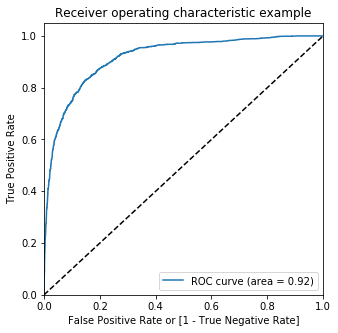

In [204]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.LeadScore)

## Finding Optimal Cutoff Point

In [205]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.LeadScore.map(lambda x: 1 if x > i*100 else 0)
y_train_pred_final.head()

,Converted,LeadScore,LeadNumber,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,72.78,1462,1,1,1,1,1,1,1,1,1,0,0
1,1,99.97,6243,1,1,1,1,1,1,1,1,1,1,1
2,0,0.45,2850,0,1,0,0,0,0,0,0,0,0,0
3,0,15.85,4903,0,1,1,0,0,0,0,0,0,0,0
4,0,4.19,2717,0,1,0,0,0,0,0,0,0,0,0


In [206]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci','precision'])
from sklearn.metrics import confusion_matrix

In [207]:
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    precision = cm1[1,1]/(cm1[1,1]+cm1[0,1])
    
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci,precision]
print(cutoff_df)

     prob  accuracy     sensi     speci  precision
0.0   0.0  0.384743  1.000000  0.000000   0.384743
0.1   0.1  0.726990  0.965517  0.577830   0.588506
0.2   0.2  0.799337  0.933190  0.715633   0.672360
0.3   0.3  0.829809  0.871228  0.803908   0.735334
0.4   0.4  0.844320  0.814116  0.863208   0.788211
0.5   0.5  0.842662  0.755388  0.897237   0.821324
0.6   0.6  0.840796  0.702586  0.927224   0.857895
0.7   0.7  0.827114  0.624461  0.953841   0.894290
0.8   0.8  0.801824  0.531250  0.971024   0.919776
0.9   0.9  0.758914  0.394935  0.986523   0.948254


### We are looking for a model high has a 80% precision cutoff. We can see from above table, that thiscut-off lies in between probability values of 0.4 and 0.5. We will assume 0.45 as our cutoff

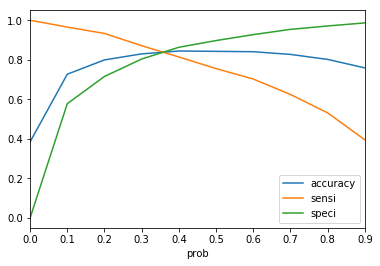

In [208]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [209]:
#### From the curve above, ~0.45 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_predicted'] = y_train_pred_final.LeadScore.map( lambda x: 1 if x > 45 else 0)

y_train_pred_final.head(50)

,Converted,LeadScore,LeadNumber,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,72.78,1462,1,1,1,1,1,1,1,1,1,0,0,1
1,1,99.97,6243,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.45,2850,0,1,0,0,0,0,0,0,0,0,0,0
3,0,15.85,4903,0,1,1,0,0,0,0,0,0,0,0,0
4,0,4.19,2717,0,1,0,0,0,0,0,0,0,0,0,0
5,0,5.75,2209,0,1,0,0,0,0,0,0,0,0,0,0
6,1,98.27,3923,1,1,1,1,1,1,1,1,1,1,1,1
7,1,95.06,3097,1,1,1,1,1,1,1,1,1,1,1,1
8,1,54.29,6166,1,1,1,1,1,1,1,0,0,0,0,1
9,0,11.14,54,0,1,1,0,0,0,0,0,0,0,0,0


In [210]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.84432006633499168

In [211]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2621,  347],
       [ 404, 1452]], dtype=int64)

In [212]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [213]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.78232758620689657

In [214]:
# Let us calculate specificity
TN / float(TN+FP)

0.88308625336927227

In [215]:
# Calculate false postive rate - predicting Conversion when customer does not have Conversioned
print(FP/ float(TN+FP))

0.116913746631


In [216]:
# positive predictive value (Precision)
print (TP / float(TP+FP))

0.807115063924


In [217]:
# Negative predictive value
print (TN / float(TN+ FN))

0.866446280992


# Making predictions on the test set

In [218]:
X_test = X_test[col]
X_test.head()

,TotalVisits,TimeOnWebsite,PageViewsPerVisit,LeadSource_Reference,LeadSource_Referral Sites,Occupation_Working Professional,LastNotableActivity_Email Opened,LastNotableActivity_SMS Sent,DoNotEmail,LeadOrigin_Landing Page Submission,Specialization_None,LeadQuality_Low in Relevance,LeadQuality_Might be,LeadQuality_Not Sure,LeadQuality_Worst
2603,0.026114,1.180245,0.652964,-0.147707,-0.127361,-0.278833,-0.708096,-0.563625,-0.302329,0.679246,-0.54573,-0.284832,-0.458846,0.792515,-0.270099
3756,-0.372544,-0.614842,0.053272,-0.147707,-0.127361,-0.278833,-0.708096,-0.563625,-0.302329,0.679246,-0.54573,-0.284832,-0.458846,0.792515,-0.270099
5216,0.424773,-0.501043,1.252656,-0.147707,-0.127361,-0.278833,-0.708096,1.774230,-0.302329,0.679246,-0.54573,-0.284832,-0.458846,0.792515,-0.270099
8832,1.620747,-0.523069,-0.144626,-0.147707,-0.127361,-0.278833,-0.708096,1.774230,-0.302329,0.679246,-0.54573,-0.284832,-0.458846,0.792515,-0.270099
4644,0.424773,-0.869972,1.252656,-0.147707,-0.127361,-0.278833,1.412237,-0.563625,-0.302329,0.679246,-0.54573,-0.284832,-0.458846,-1.261806,3.702339


In [219]:
X_test_sm = sm.add_constant(X_test)

## Making predictions on the test set

In [220]:
y_test_pred = res.predict(X_test_sm)

In [221]:
y_test_pred[:10]

2603    0.275948
3756    0.058247
5216    0.261940
8832    0.430692
4644    0.006708
1201    0.568036
4565    0.132016
9144    0.032176
3060    0.789969
7876    0.686300
dtype: float64

In [222]:
# Converting y_pred to a dataframe which is an array
y_pred_2 = pd.DataFrame(round(y_test_pred*100,2))

In [223]:
# Let's see the head
y_pred_2.head()

,0
2603,27.59
3756,5.82
5216,26.19
8832,43.07
4644,0.67


In [224]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [225]:
# Putting Lead Number to index
y_test_df['LeadNumber'] = lead_number

In [226]:
# Removing index for both dataframes to append them side by side 
y_pred_2.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [227]:
# Appending y_test_df and y_pred_1
y_pred_final2 = pd.concat([y_test_df, y_pred_2],axis=1)

In [228]:
y_pred_final2.head()

,Converted,LeadNumber,0
0,0,634595,27.59
1,0,624187,5.82
2,0,609819,26.19
3,0,582525,43.07
4,0,615194,0.67


In [229]:
# Renaming the column 
y_pred_final2= y_pred_final2.rename(columns={ 0 : 'LeadScore'})

In [230]:
# Rearranging the columns
#y_pred_final = y_pred_final.reindex_axis(['Lead Number','Conversion','LeadScore'], axis=1)

In [231]:
# Let's see the head of y_pred_final
y_pred_final2.head()

,Converted,LeadNumber,LeadScore
0,0,634595,27.59
1,0,624187,5.82
2,0,609819,26.19
3,0,582525,43.07
4,0,615194,0.67


In [232]:
y_pred_final2['final_predicted'] = y_pred_final2.LeadScore.map(lambda x: 1 if x > 45 else 0)

In [233]:
y_pred_final2.head()

,Converted,LeadNumber,LeadScore,final_predicted
0,0,634595,27.59,0
1,0,624187,5.82,0
2,0,609819,26.19,0
3,0,582525,43.07,0
4,0,615194,0.67,0


In [234]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final2.Converted, y_pred_final2.final_predicted)

0.86025145067698261

In [235]:
confusion2 = metrics.confusion_matrix(y_pred_final2.Converted, y_pred_final2.final_predicted )
confusion2

array([[1139,  146],
       [ 143,  640]], dtype=int64)

In [236]:
conf_df =pd.DataFrame(confusion2)
conf_df

,0,1
0,1139,146
1,143,640


In [237]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [238]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.81736909323116225

In [239]:
# Let us calculate specificity
TN / float(TN+FP)

0.8863813229571984

In [240]:
# positive predictive value (Precision) 
print (TP / float(TP+FP))

0.814249363868


In [241]:
# negative predictive value 
print (TN / float(TN+FN))

0.888455538222


# Merging Train and Test Output

In [242]:
y_pred_final1= y_train_pred_final.loc[:,['Converted','LeadScore','LeadNumber','final_predicted']]
y_pred_final1.head()

,Converted,LeadScore,LeadNumber,final_predicted
0,0,72.78,1462,1
1,1,99.97,6243,1
2,0,0.45,2850,0
3,0,15.85,4903,0
4,0,4.19,2717,0


In [243]:
y_pred_full =pd.concat([y_pred_final1,y_pred_final2])
y_pred_full.shape

(6892, 4)

## Visualizing Model

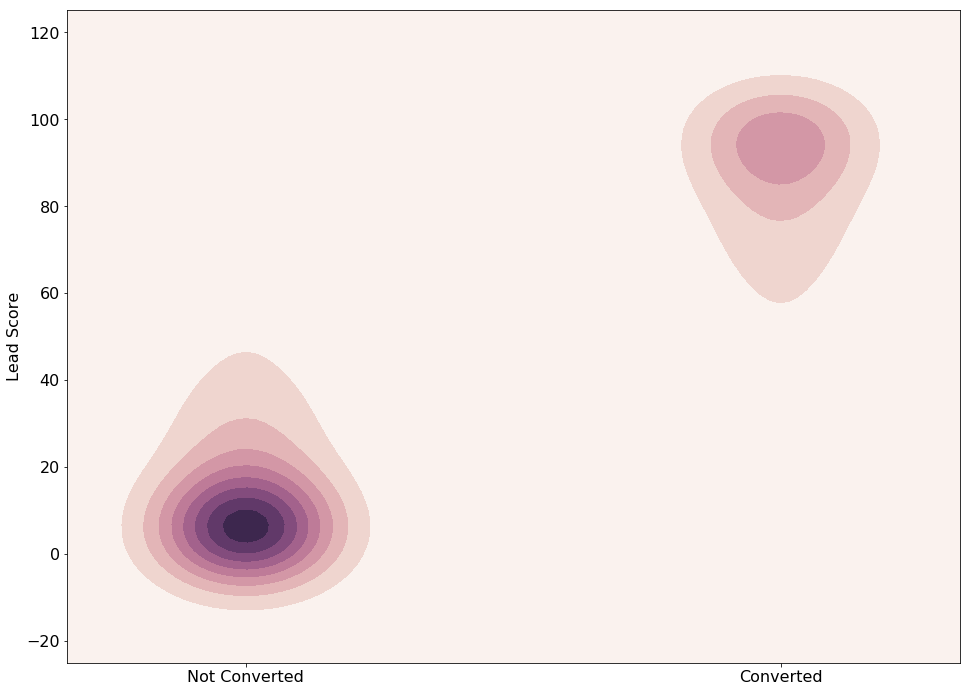

In [244]:
plt.figure(figsize=(16,12))
plt.rcParams.update({'font.size':16})
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
plt.xticks([0,1],('Not Converted','Converted'))
sns.kdeplot(y_pred_final2.Converted,y_pred_final2.LeadScore,cmap=cmap,shade=True)
plt.xlabel('')
plt.ylabel('Lead Score')
plt.savefig('density.png')
plt.show()

In [246]:
train_df = pd.merge(left=leads_copy, right=y_pred_final2,left_index=True,right_index=True)
train_df.head()

,LeadOrigin,LeadSource,DoNotEmail,Converted_x,TotalVisits,TimeOnWebsite,PageViewsPerVisit,Country,Specialization,Occupation,KeyDriver,LeadQuality,GetTheInterview,LastNotableActivity,Converted_y,LeadNumber,LeadScore,final_predicted
1,API,Organic Search,0,0,5.0,674,2.5,India,None,Unemployed,Better Career Prospects,Not Sure,0,Email Opened,0,624187,5.82,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,India,Business Administration,Student,Better Career Prospects,Might be,1,Email Opened,0,609819,26.19,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,India,Media and Advertising,Unemployed,Better Career Prospects,Not Sure,0,Modified,0,582525,43.07,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,India,None,Unemployed,Better Career Prospects,Might be,0,Modified,0,615194,0.67,0
6,Landing Page Submission,Google,0,1,2.0,1640,2.0,India,Supply Chain Management,Unemployed,Better Career Prospects,Low in Relevance,0,Modified,0,615958,13.20,0


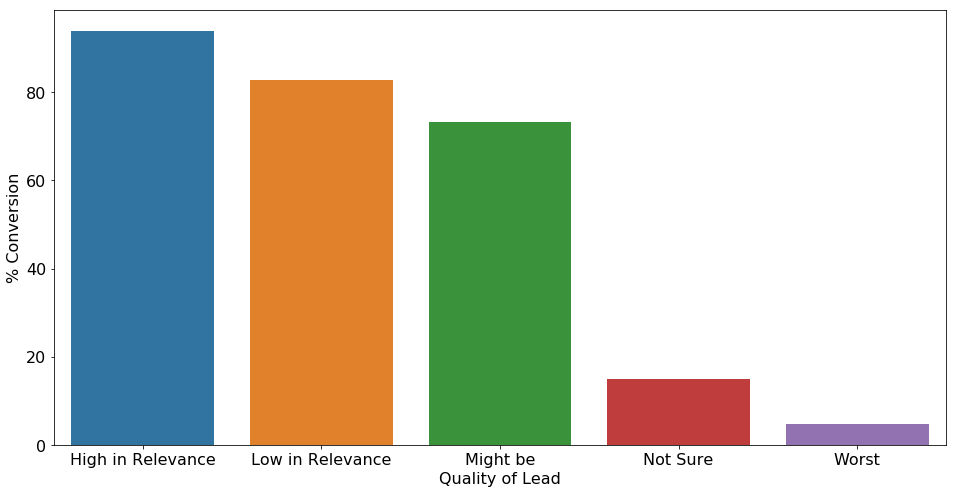

In [247]:
plt.figure(figsize=(16,8))
LQ = pd.DataFrame(train_df.Converted_x.groupby(train_df.LeadQuality).mean()).reset_index()
sns.barplot(LQ.LeadQuality,LQ.Converted_x*100)
plt.ylabel('% Conversion')
plt.xlabel('Quality of Lead')
plt.savefig('LeadQuality.png')
plt.show()

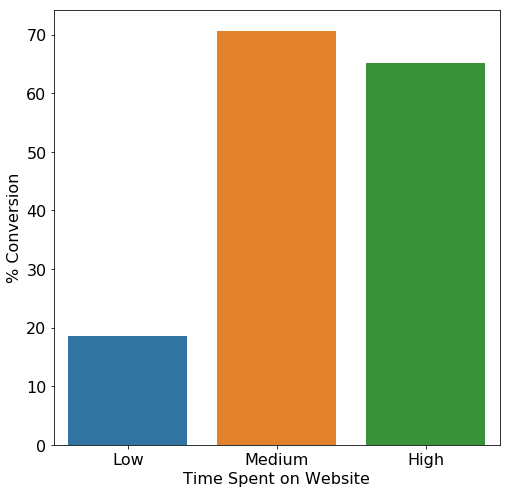

In [248]:
plt.figure(figsize=(8,8))
train_df['tw'] = pd.cut(train_df.TimeOnWebsite, bins=3, include_lowest=True)
TW= pd.DataFrame(train_df.Converted_x.groupby(train_df.tw).mean()).reset_index()
sns.barplot(TW.tw,TW.Converted_x*100)
plt.ylabel('% Conversion')
plt.xlabel('Time Spent on Website')
plt.xticks(np.arange(3),('Low','Medium','High'))
plt.savefig('TimeonWebsite.png')
plt.show()


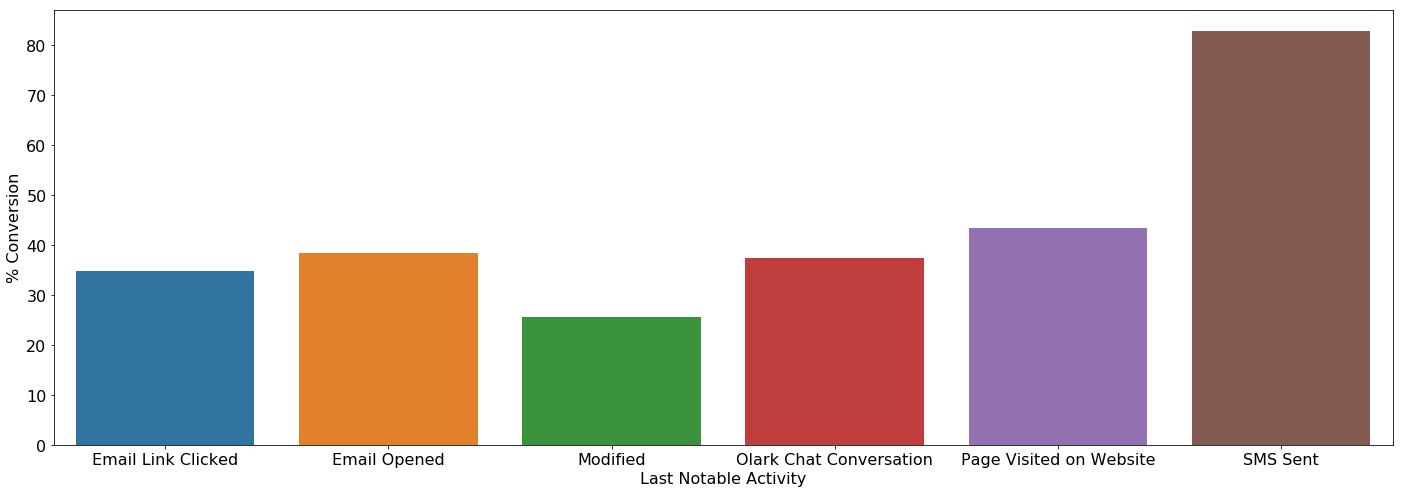

In [249]:
plt.figure(figsize=(24,8))
train_df_2=train_df.loc[train_df.LastNotableActivity.isin(['Email Opened','Modified','SMS Sent','Page Visited on Website','Email Link Clicked','Olark Chat Conversation'])]
LNA = pd.DataFrame(train_df_2.Converted_x.groupby(train_df_2.LastNotableActivity).mean()).reset_index()
sns.barplot(LNA.LastNotableActivity,LNA.Converted_x*100)
plt.ylabel('% Conversion')
plt.xlabel('Last Notable Activity')
plt.savefig('LNA.png')
plt.show()

#### 3.	X Education has a period of 2 months every year during which they hire some interns. The sales team, in particular, has around 10 interns allotted to them. So during this phase, they wish to make the lead conversion more aggressive. So they want almost all of the potential leads (i.e. the customers who have been predicted as 1 by the model) to be converted and hence, want to make phone calls to as much of such people as possible. Suggest a good strategy they should employ at this stage

#### A good strategy would be prioritize calls to high probabilty leads vis-a-vis the low probability leads. In order to do so, we can  sort the leads by lead scores (in descending order), start with the leads with the highest lead score and then go down the score order

In [254]:
y_pred_final2.sort_values('LeadScore',ascending=False).to_csv('sorted_LeadScores.csv')

#### 4.	Similarly, at times, the company reaches its target for a quarter before the deadline. During this time, the company wants the sales team to focus on some new work as well. So during this time, the company’s aim is to not make phone calls unless it’s extremely necessary, i.e. they want to minimize the rate of useless phone calls. Suggest a strategy they should employ at this stage.

In [251]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['Lead Score','False Positive Rate'])
from sklearn.metrics import confusion_matrix

In [252]:
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    
    FP_rate =round(100-(cm1[1,1]/(cm1[1,1]+cm1[0,1])*100),2)
    
    cutoff_df.loc[i] =[ i*100 ,FP_rate]
pd.DataFrame(cutoff_df)

,Lead Score,False Positive Rate
0.0,0.0,61.53
0.1,10.0,41.15
0.2,20.0,32.76
0.3,30.0,26.47
0.4,40.0,21.18
0.5,50.0,17.87
0.6,60.0,14.21
0.7,70.0,10.57
0.8,80.0,8.02
0.9,90.0,5.17


#### In this case, we would want to minimize false positives- i.e. cases where the model predicts potential conversion, but the lead does not convert. To do so, we can increase the minimum threshold Lead Score above which a call would be warranted. In our selected model, anyone with Lead Score of above 42 is considered as a potential convert. At this Lead Score, the false positive rate is ~20%. If we increase the minimum Lead Score, the False Positive Rate would decrease. So, for example, we want to decrease useless calls to about 10%, we can choose the threshold of 70 for the Lead Score